# UE19CS390B – Capstone Project Phase – 2 #
# Interpretability of a joint learning problem by combining graph and text #

## Import Packages ##

In [1]:
import networkx as nx
import gzip
import ujson as json
import itertools
# import treelib
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import from_networkx
import torch_geometric.utils.convert
from torch_geometric.loader import DataLoader
import pandas as pd
import torch

In [2]:
print(torch.__version__)


1.11.0


In [3]:
df1=pd.read_csv(r"C:\Users\91900\Capstone\cap-main\finalirmap.csv")
df1.dtypes

id             int64
created_at    object
text          object
text_info     object
dtype: object

In [4]:
df_all=pd.read_csv(r"C:\Users\91900\Capstone\cap-main\alldatasetspre.csv")
df_all

label                                               text
0          informative  rt gizmodo wildfires raging northern californi...
1          informative            photos deadly wildfires rage california
2          informative  rt cal oes pls share capturing wildfire respon...
3          informative  rt cal oes pls share capturing wildfire respon...
4          informative     rt time california raging wildfires never seen
...                ...                                                ...
18077  not_informative                            get mora try whole menu
18078  not_informative  mirka mora b 1928 noted french born australian...
18079  not_informative      paulmalignaggi lol u sergio mora horn winning
18080  not_informative      cameroon 4 female suicide bombers kill 1 mora
18081  not_informative  rt saakey6251413 happened visit cyclonemora ba...

[18082 rows x 2 columns]

In [5]:
df_hyd = pd.read_csv(r"C:\Users\91900\tweetids4 (2).csv")
df_hyd

coordinates                      created_at  \
0            NaN  Thu Sep 07 02:54:38 +0000 2017   
1            NaN  Thu Sep 07 03:16:46 +0000 2017   
2            NaN  Thu Sep 07 02:53:58 +0000 2017   
3            NaN  Thu Sep 07 03:17:09 +0000 2017   
4            NaN  Thu Sep 07 02:54:15 +0000 2017   
...          ...                             ...   
3142         NaN  Tue Sep 19 21:38:32 +0000 2017   
3143         NaN  Tue Sep 19 22:32:45 +0000 2017   
3144         NaN  Tue Sep 19 22:33:06 +0000 2017   
3145         NaN  Tue Sep 19 22:33:16 +0000 2017   
3146         NaN  Tue Sep 19 22:33:58 +0000 2017   

                                   hashtags  \
0                                       NaN   
1                                   chsnews   
2                             HurricaneIrma   
3     storm irma hurricaneirma2017 santiago   
4                                       NaN   
...                                     ...   
3142      Trump Harvey Irma Maria RocketMan   
3143                                   Irma   
3144                    HurricaneMaria Irma   
3145                                    NaN   
3146                                    NaN   

                                                  media  \
0     https://twitter.com/FinanceRadr/status/9056253...   
1     https://twitter.com/Live5News/status/905630740...   
2     https://twitter.com/RawStory/status/9054742573...   
3     https://twitter.com/travelingJolie/status/9056...   
4     https://twitter.com/thehill/status/90548049233...   
...                                                 ...   
3142  https://twitter.com/dominicalicia99/status/910...   
3143  https://twitter.com/CamdenCountyEMA/status/910...   
3144  https://twitter.com/multimenon/status/91027055...   
3145  https://twitter.com/WewokaChronicle/status/910...   
3146  https://twitter.com/1worldbuzz/status/91027076...   

                                                   urls  favorite_count  \
0     http://www.finance-radar.com/dramatic-photo-sh...               0   
1     http://www.live5news.com/story/36250937/eye-of...               0   
2     http://www.rawstory.com/2017/09/here-are-6-ter...               0   
3                                                   NaN               0   
4                                http://hill.cm/fGLBoBy               0   
...                                                 ...             ...   
3142                                                NaN               0   
3143                                                NaN               0   
3144                                                NaN               0   
3145                               http://ti.me/2hfXnfD               0   
3146                            https://buff.ly/2f9aOKl               1   

                      id in_reply_to_screen_name  in_reply_to_status_id  \
0     905625325723373568                     NaN                    NaN   
1     905630897541718017                     NaN                    NaN   
2     905625160904044549                     NaN                    NaN   
3     905630995998748674                     NaN                    NaN   
4     905625230843846656                     NaN                    NaN   
...                  ...                     ...                    ...   
3142  910256821134401536                     CNN           9.102488e+17   
3143  910270462822895617                     NaN                    NaN   
3144  910270554812317697              multimenon           9.056298e+17   
3145  910270595262291968                     NaN                    NaN   
3146  910270769653075969                     NaN                    NaN   

      in_reply_to_user_id  ... user_followers_count user_friends_count  \
0                     NaN  ...                  394                639   
1                     NaN  ...                  441                659   
2                     NaN  ...                  920               2258   
3       

In [6]:
df_join = pd.merge(df_hyd.drop_duplicates(), df1.drop_duplicates(), on='id', how='inner')
df_join.drop_duplicates()

coordinates                    created_at_x  \
0            NaN  Thu Sep 07 02:54:38 +0000 2017   
1            NaN  Thu Sep 07 03:16:46 +0000 2017   
2            NaN  Thu Sep 07 02:53:58 +0000 2017   
3            NaN  Thu Sep 07 03:17:09 +0000 2017   
4            NaN  Thu Sep 07 02:54:15 +0000 2017   
...          ...                             ...   
3145         NaN  Tue Sep 19 21:38:32 +0000 2017   
3146         NaN  Tue Sep 19 22:32:45 +0000 2017   
3147         NaN  Tue Sep 19 22:33:06 +0000 2017   
3148         NaN  Tue Sep 19 22:33:16 +0000 2017   
3149         NaN  Tue Sep 19 22:33:58 +0000 2017   

                                   hashtags  \
0                                       NaN   
1                                   chsnews   
2                             HurricaneIrma   
3     storm irma hurricaneirma2017 santiago   
4                                       NaN   
...                                     ...   
3145      Trump Harvey Irma Maria RocketMan   
3146                                   Irma   
3147                    HurricaneMaria Irma   
3148                                    NaN   
3149                                    NaN   

                                                  media  \
0     https://twitter.com/FinanceRadr/status/9056253...   
1     https://twitter.com/Live5News/status/905630740...   
2     https://twitter.com/RawStory/status/9054742573...   
3     https://twitter.com/travelingJolie/status/9056...   
4     https://twitter.com/thehill/status/90548049233...   
...                                                 ...   
3145  https://twitter.com/dominicalicia99/status/910...   
3146  https://twitter.com/CamdenCountyEMA/status/910...   
3147  https://twitter.com/multimenon/status/91027055...   
3148  https://twitter.com/WewokaChronicle/status/910...   
3149  https://twitter.com/1worldbuzz/status/91027076...   

                                                   urls  favorite_count  \
0     http://www.finance-radar.com/dramatic-photo-sh...               0   
1     http://www.live5news.com/story/36250937/eye-of...               0   
2     http://www.rawstory.com/2017/09/here-are-6-ter...               0   
3                                                   NaN               0   
4                                http://hill.cm/fGLBoBy               0   
...                                                 ...             ...   
3145                                                NaN               0   
3146                                                NaN               0   
3147                                                NaN               0   
3148                               http://ti.me/2hfXnfD               0   
3149                            https://buff.ly/2f9aOKl               1   

                      id in_reply_to_screen_name  in_reply_to_status_id  \
0     905625325723373568                     NaN                    NaN   
1     905630897541718017                     NaN                    NaN   
2     905625160904044549                     NaN                    NaN   
3     905630995998748674                     NaN                    NaN   
4     905625230843846656                     NaN                    NaN   
...                  ...                     ...                    ...   
3145  910256821134401536                     CNN           9.102488e+17   
3146  910270462822895617                     NaN                    NaN   
3147  910270554812317697              multimenon           9.056298e+17   
3148  910270595262291968                     NaN                    NaN   
3149  910270769653075969                     NaN                    NaN   

      in_reply_to_user_id  ...                user_location  \
0                     NaN  ...               Washington, DC   
1                     NaN  ...  Sea Islands, South Carolina   
2                     NaN  ...              California, USA   
3                     NaN  ...          Zurich, Swit

In [7]:
df_join.columns

Index(['coordinates', 'created_at_x', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text_x', 'tweet_url',
       'user_created_at', 'user_id', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_screen_name', 'user_statuses_count', 'user_time_zone',
       'user_urls', 'user_verified', 'created_at_y', 'text_y', 'text_info'],
      dtype='object')

In [8]:
favorite_count, id, retweet_count, user_followers_count, user_listed_count, user_verified
dict_keys(['followers_count', 'listed_count'])
dict_keys(['retweet_count', 'like_count'])

NameError: name 'favorite_count' is not defined

In [8]:
df1.drop_duplicates()["id"].value_counts()

909938122309353472    2
909976839006949376    2
910261997660459013    2
909693496579301376    2
909913791865004033    2
                     ..
909718650403393539    1
909718759618826240    1
909718789943709696    1
909718820968833030    1
910270769653075969    1
Name: id, Length: 3143, dtype: int64

In [9]:
df1

id                      created_at  \
0     905625009430949888  Thu Sep 07 02:53:22 +0000 2017   
1     905625059326353409  Thu Sep 07 02:53:34 +0000 2017   
2     905625064451833856  Thu Sep 07 02:53:35 +0000 2017   
3     905625073628975106  Thu Sep 07 02:53:37 +0000 2017   
4     905625088300654592  Thu Sep 07 02:53:41 +0000 2017   
...                  ...                             ...   
3515  910270036861886465  Tue Sep 19 22:31:03 +0000 2017   
3516  910270462822895617  Tue Sep 19 22:32:45 +0000 2017   
3517  910270554812317697  Tue Sep 19 22:33:06 +0000 2017   
3518  910270595262291968  Tue Sep 19 22:33:16 +0000 2017   
3519  910270769653075969  Tue Sep 19 22:33:58 +0000 2017   

                                                   text        text_info  
0         island barbuda literally water hurricane irma      informative  
1           11pm hurricane irma update abc7news weather      informative  
2     hurricane irma destroys upwards 90 barbuda off...      informative  
3      5 pm track update hurricane irma flwx gawx jaxwx      informative  
4            11 pm advisory hurricane irma firstalertwx      informative  
...                                                 ...              ...  
3515  hurricane irma first impacts nassau bahamas 9 ...      informative  
3516                               local resources irma      informative  
3517  whoa delta pull one last minute inbound flight...      informative  
3518  new story science amp health time cardi b comp...  not_informative  
3519  watch two cyclists spotted ride hurricane irma...      informative  

[3520 rows x 4 columns]

In [10]:
s='Tue Sep 19 15:47:08 +0000 2017'
ts_list = pd.to_datetime([s], infer_datetime_format=True)
#print(ts_list.values)
import dateutil.parser as parser
parser.parse(s)

def time_parser(ts):
    dobject=parser.parse(ts)
    return  dobject

In [11]:
from transformers import BertForSequenceClassification, AdamW, BertConfig, BertTokenizer


In [12]:
import torch

if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


## Import BERT Model ##

In [13]:
output_dir = './model_save/'

bert = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained(output_dir)

bert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [14]:
def getEmbed(text):
    
    marked_text = "[CLS] " + text + " [SEP]"

    tokenized_text = tokenizer.tokenize(marked_text)

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)


    segments_ids = [1] * len(tokenized_text)
    
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])
    bert.eval()
    with torch.no_grad():

        outputs = bert(tokens_tensor, segments_tensors)

    
        hidden_states = outputs[1]
        token_vecs = hidden_states[-2][0]
        sentence_embedding = torch.mean(token_vecs, dim=0)
        res=sentence_embedding.numpy()
        return list(res)

## Create Conversation Graphs ##

In [16]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    
    for i in data["includes"]:
        #print(i)
        print(i["users"][0]["public_metrics"].keys())
        print(i["users"][0]["verified"])
        break
    for i in data["data"][0]:
        print(i["public_metrics"].keys())
    break
        

dict_keys(['followers_count', 'following_count', 'tweet_count', 'listed_count'])
False
dict_keys(['retweet_count', 'reply_count', 'like_count', 'quote_count'])
dict_keys(['retweet_count', 'reply_count', 'like_count', 'quote_count'])
dict_keys(['retweet_count', 'reply_count', 'like_count', 'quote_count'])
dict_keys(['retweet_count', 'reply_count', 'like_count', 'quote_count'])


In [17]:
favorite_count, id, retweet_count, user_followers_count, user_listed_count, user_verified
dict_keys(['followers_count', 'listed_count'])
dict_keys(['retweet_count', 'like_count'])
i["users"][0]["verified"]

NameError: name 'favorite_count' is not defined

In [ ]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    rootid=int(filename[:-6])
    r=df_join.loc[df_join['id']==rootid,['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified', 'text_info']]
    #print(r.values[0])
    label=r.values[0][5]
    #print(label)
    d={}

    #d[rootid]={'time': getEmbed(c),'text': getEmbed(t)}
    
    G=nx.DiGraph()
    G.add_node(rootid)

    for i in data['data'][0]:
        tweet_id = int(i['id'])
        G.add_node(int(i['id']))
        #d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        d[int(i['id'])]={'retweet_count': i["public_metrics"]['retweet_count'],'favorite_count': i["public_metrics"]['like_count']}
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))
    for i in data["includes"]:
        d[] = 
    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    nx.set_node_attributes(G1, d)

    try:
        g_data=from_networkx(G1, group_node_attrs=['text', 'time'])

        g_data.y=0 if label=='informative' else 1
        data_arr.append(g_data)
    except:
        continue
    
        
print(len(data_arr))
    


In [109]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    #print(data['includes'])
    rootid=int(filename[:-6])
    r=df_join.loc[df_join['id']==rootid,['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified', 'text_info']]
    f,r,uf,ul,uv,label = r.values[0]
    if uv == True:
        uv = 1
    else:
        uv = 0 
    d={}
    d[rootid]={'favorite_count': f, 'retweet_count': r, 'user_followers_count': uf, 'user_listed_count': ul, 'user_verified': uv}
    G=nx.DiGraph()
    G.add_node(rootid)
        
    for i,j in zip(data['data'][0], data["includes"]):
        G.add_node(int(i['id']))
        #d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        if j["users"][0]["verified"]==True:
            uv_1 = 1
        else: 
            uv_1 = 0
        d[int(i['id'])]={'favorite_count': i["public_metrics"]['like_count'],'retweet_count': i["public_metrics"]['retweet_count'], 'user_followers_count': j["users"][0]["public_metrics"]['followers_count'], 'user_listed_count': j["users"][0]["public_metrics"]['listed_count'], 'user_verified': uv_1}
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))

    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    #nx.draw(G1,with_labels=True)
    #print(d)
    nx.set_node_attributes(G1, d)
    #print(nx.get_node_attributes(G1,'favorite_count'))

    try:
        g_data=from_networkx(G1, group_node_attrs=['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified'])
        #print(rootid)
        #g_data=from_networkx(G1)
        g_data.y=0 if label=='informative' else 1
        data_arr.append(g_data)
    except:
        continue
    
        
print(len(data_arr))
    


250


In [141]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    #print(data['includes'])
    rootid=int(filename[:-6])
    r=df_join.loc[df_join['id']==rootid,['favorite_count', 'retweet_count', 'text_info']]
    f,r, label = r.values[0] 
    d={}
    d[rootid]={'fc': int(f), 'rc': int(r)}
    
    G=nx.DiGraph()
    G.add_node(rootid)
        
    for i,j in zip(data['data'][0], data["includes"]):
        G.add_node(int(i['id']))
        d[int(i['id'])]={'fc': int(i["public_metrics"]['like_count']),'rc': int(i["public_metrics"]['retweet_count'])}
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))

    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    #nx.draw(G1,with_labels=True)
    nx.set_node_attributes(G1, d)
    
    try:
        g_data=from_networkx(G1, group_node_attrs=['fc', 'rc'])
        #print(rootid)
        #g_data=from_networkx(G1)
        g_data.y=0 if label=='informative' else 1
        data_arr.append(g_data)
    except:
        continue

print(len(data_arr))

250


In [16]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    #print(data['includes'])
    rootid=int(filename[:-6])
    r=df_join.loc[df_join['id']==rootid,['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified', 'text_info']]
    f,r,uf,ul,uv,label = r.values[0] 
    if uv == True:
        uv = 1
    else:
        uv = 0 
    d={}
    d[rootid]={'favorite_count': list(np.array([str(f)]).astype(float)), 'retweet_count': list(np.array([str(r)]).astype(float)), 'user_followers_count': list(np.array([str(uf)]).astype(float)), 'user_listed_count': list(np.array([str(ul)]).astype(float)), 'user_verified': list(np.array([str(uv)]).astype(float))}

    G=nx.DiGraph()
    G.add_node(rootid)
        
    for i,j in zip(data['data'][0], data["includes"]):
        G.add_node(int(i['id']))
        #d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        #print(type(getEmbed(str(i["public_metrics"]['like_count']))))
        #print(i["public_metrics"]['retweet_count'])
        if j["users"][0]["verified"]==True:
            uv_1 = 1
        else: 
            uv_1 = 0
        d[int(i['id'])]={'favorite_count': list(np.array([(str(i["public_metrics"]['like_count']))]).astype(float)),'retweet_count': list(np.array([(str(i["public_metrics"]['retweet_count']))]).astype(float)),
                         'user_followers_count':  list(np.array([(j["users"][0]["public_metrics"]['followers_count'])]).astype(float)), 'user_listed_count':  list(np.array([(str(j["users"][0]["public_metrics"]['listed_count']))]).astype(float)), 'user_verified': list(np.array([(str(uv_1))]).astype(float))}
        print(d[int(i['id'])])
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))

    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    #nx.draw(G1,with_labels=True)
    #print(d)
    nx.set_node_attributes(G1, d)
    #print(nx.get_node_attributes(G1,'favorite_count'))

    try:
        g_data=from_networkx(G1, group_node_attrs=['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified'])
        #print(rootid)
        #g_data=from_networkx(G1)
        g_data.y=torch.LongTensor(0) if label=='informative' else torch.LongTensor(1)
        data_arr.append(g_data)
    except Exception as e: continue#print(e)
    
        
print(len(data_arr))
    


{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [259.0], 'user_listed_count': [4.0], 'user_verified': [0.0]}
{'favorite_count': [2.0], 'retweet_count': [0.0], 'user_followers_count': [201.0], 'user_listed_count': [1.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [3226.0], 'user_listed_count': [43.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [419.0], 'user_listed_count': [8.0], 'user_verified': [0.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0], 'user_followers_count': [37.0], 'user_listed_count': [1.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [3447.0], 'user_listed_count': [15.0], 'user_verified': [0.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0], 'user_followers_count': [101.0], 'user_listed_count': [0.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'u

{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [198.0], 'user_listed_count': [1.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [166.0], 'user_listed_count': [0.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [15.0], 'user_listed_count': [1.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [7819.0], 'user_listed_count': [174.0], 'user_verified': [1.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [496.0], 'user_listed_count': [1.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [16790.0], 'user_listed_count': [169.0], 'user_verified': [0.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0], 'user_followers_count': [185.0], 'user_listed_count': [2.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0],

{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [3876.0], 'user_listed_count': [100.0], 'user_verified': [0.0]}
{'favorite_count': [3.0], 'retweet_count': [0.0], 'user_followers_count': [60.0], 'user_listed_count': [1.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [2143.0], 'user_listed_count': [32.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [321.0], 'user_listed_count': [6.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [219.0], 'user_listed_count': [16.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [655.0], 'user_listed_count': [90.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [4971.0], 'user_listed_count': [22.0], 'user_verified': [0.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0

{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [1773.0], 'user_listed_count': [25.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [524.0], 'user_listed_count': [12.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [6.0], 'user_listed_count': [0.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [2264.0], 'user_listed_count': [7.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [360.0], 'user_listed_count': [0.0], 'user_verified': [0.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0], 'user_followers_count': [543.0], 'user_listed_count': [2.0], 'user_verified': [0.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0], 'user_followers_count': [1450.0], 'user_listed_count': [34.0], 'user_verified': [0.0]}
{'favorite_count': [2.0], 'retweet_count': [0.0], '

{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [216.0], 'user_listed_count': [9.0], 'user_verified': [0.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0], 'user_followers_count': [201.0], 'user_listed_count': [12.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [4160.0], 'user_listed_count': [65.0], 'user_verified': [0.0]}
{'favorite_count': [0.0], 'retweet_count': [0.0], 'user_followers_count': [0.0], 'user_listed_count': [0.0], 'user_verified': [0.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0], 'user_followers_count': [151.0], 'user_listed_count': [0.0], 'user_verified': [0.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0], 'user_followers_count': [0.0], 'user_listed_count': [0.0], 'user_verified': [0.0]}
{'favorite_count': [8.0], 'retweet_count': [9.0], 'user_followers_count': [84530.0], 'user_listed_count': [1165.0], 'user_verified': [1.0]}
{'favorite_count': [1.0], 'retweet_count': [0.0], '

{'favorite_count': [1.0], 'retweet_count': [0.0], 'user_followers_count': [17.0], 'user_listed_count': [0.0], 'user_verified': [0.0]}
250


In [28]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    #print(data['includes'])
    rootid=int(filename[:-6])
    r=df_join.loc[df_join['id']==rootid,['favorite_count', 'retweet_count', 'text_info']]
    f,r,label = r.values[0] 
    #print(f)
    d={}
    d[rootid]={'favorite_count': getEmbed((str(f))), 'retweet_count': getEmbed(str(r))}
    G=nx.DiGraph()
    G.add_node(rootid)
        
    for i,j in zip(data['data'][0], data["includes"]):
        G.add_node(int(i['id']))
        #d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        #print(type(getEmbed(str(i["public_metrics"]['like_count']))))
        #print(i["public_metrics"]['retweet_count'])
        if j["users"][0]["verified"]==True:
            uv_1 = 1
        else: 
            uv_1 = 0
        d[int(i['id'])]={'favorite_count': getEmbed((str(i["public_metrics"]['like_count']))),'retweet_count': getEmbed((str(i["public_metrics"]['retweet_count'])))}
        #print(d[int(i['id'])])
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))

    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    #nx.draw(G1,with_labels=True)
    #print(d)
    nx.set_node_attributes(G1, d)
    #print(nx.get_node_attributes(G1,'favorite_count'))

    try:
        g_data=from_networkx(G1, group_node_attrs=['favorite_count', 'retweet_count'])
        #print(rootid)
        #g_data=from_networkx(G1)
        g_data.y=0 if label=='informative' else 1
        data_arr.append(g_data)
    except Exception as e: continue #print(e)
    
        
print(len(data_arr))
    


{905625059326353409: {'favorite_count': [-0.33415934, 0.089886315, -0.08428339, -0.5269609, 0.17458571, -0.31979078, 0.08171822, -0.089779176, 0.28064898, -0.3661921, -0.17041774, -0.0376894, 0.6539832, -0.25276172, 0.55700475, 0.18206437, 0.16782653, 0.21334612, -0.16970979, 0.43383434, 0.19161999, 0.011624205, -0.20088851, 0.35666895, 0.068346, -0.38539207, -0.13752365, 0.19083555, -0.3624905, 0.5557994, 0.04794708, 0.12835838, 0.020871654, -0.0050802403, 0.47147825, 0.20248783, 0.60792845, -0.13654244, -0.20431767, 0.34186685, 0.0996565, -0.3864515, 0.10366917, -0.55274767, 0.36448064, -0.25615528, -1.2148975, 0.22741504, -0.14473374, -0.0061695226, -0.37859058, -0.06173856, -0.4142301, 0.1630501, 0.32082757, -0.28147593, 0.47514018, -0.48080567, -0.326251, 0.052471194, 0.3191164, -0.13001598, -0.03365655, 0.5578482, 0.038633257, -0.031064129, 0.2947078, 0.5140223, -0.45335293, 0.27242556, -0.475523, 0.09816078, -0.049671758, 0.2670381, 0.18650699, -0.16221422, 0.16486809, 0.1364109

{905636822923051008: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{905642255561637888: {'favorite_count': [0.15894604, 0.13345276, -0.13063784, -0.31250563, -0.1634831, -0.34132662, -0.026467206, -0.4567198, -0.14614676, -0.6023608, -0.17196362, -0.15080543, 0.6433927, 0.011405993, -0.08261653, -0.008139059, 0.07328639, -0.021899885, 0.13850735, 0.479666, 0.36259362, -0.032407816, 0.09886539, 0.19583754, 0.39625087, -0.21411793, 0.12382539, 0.037915606, -0.096782036, 0.744437, -0.1302249, 0.48972538, 0.054798473, 0.17601748, 0.008867111, 0.25888553, 0.109444, -0.17354226, -0.39590523, 0.38375935, -0.07139186, -0.6683223, -0.30294314, -0.36579528, 0.47724864, -0.26332825, -1.1281822, 0.3902527, -0.07228605, 0.21906058, -0.3748754, -0.0024084523, -0.43645093, 0.04659931, 0.43009305, -0.35192, 0.13615572, -0.27315232, -0.07078483, -0.04804008, 0.3431356, 0.014669524, 0.14179401, 0.025443612, 0.25944784, -0.09922426, 0.26895818, 0.1359189, -0.42035306, 0.63288814, -0.38877615, -0.15659086, 0.09817251, 0.1698261, 0.4050652, -0.10344089, 0.39200702, 0.2247

{905647759050420225: {'favorite_count': [-0.044853866, 0.41039053, 0.15725966, -0.52103907, 0.016836705, -0.41877973, 0.21153814, 0.020503739, 0.07740738, -0.35362515, -0.07832632, 0.019715995, 0.3387563, 0.008060877, 0.43540442, -0.05915529, 0.11893367, -0.19269395, 0.108350694, 0.20398557, 0.10895437, -0.09263689, -0.35601497, 0.2746865, 0.014173758, -0.17411096, 0.024038339, 0.15892334, 0.008659913, 0.57950646, -0.088551424, 0.21273299, 0.0690887, 0.39135993, 0.55544585, 0.3357456, 0.1869235, 0.11895749, -0.3605688, 0.33630982, -0.42605767, -0.5185314, 0.08989284, -0.5703735, 0.3538252, -0.016923225, -1.0324343, 0.15409675, 0.06093866, 0.13000543, -0.38519016, -0.12717076, -0.2224881, 0.10676285, 0.053540926, -0.14364259, 0.13807304, -0.44501945, 0.06923941, 0.23742567, 0.3209206, -0.44305488, -0.17796092, 0.14036933, 0.045944426, -0.09889447, 0.29623166, 0.2536568, -0.5055251, 0.52587205, -0.2589851, -0.38638353, 0.012393389, 0.13376342, -0.057107102, -0.16140825, 0.07366067, 0.222

{905664488505958401: {'favorite_count': [0.01709532, 0.14393036, 0.027622553, -0.5501705, -0.07323939, -0.3118426, 0.1502569, 0.0376824, 0.1111542, -0.55363864, -0.13994285, -0.095551975, 0.34667525, 0.28297213, 0.32250938, 0.10378015, 0.2347333, 0.47038987, -0.07029287, 0.30512944, 0.1551897, 0.034776706, 0.19201614, -0.013095777, 0.17589231, -0.08764837, -0.13107881, -0.041839108, -0.23429672, 0.34190178, -0.061903033, -0.07809345, 0.29014537, -0.084637664, 0.64991397, 0.19475873, 0.12948446, -0.37767425, -0.19089907, 0.23236711, 0.15367338, -0.23021282, -0.28201097, -0.25597644, 0.47668195, -0.1892907, -1.2686428, -0.015682267, -0.13455133, -0.04035021, 0.038793866, -0.35969296, -0.0558455, 0.2345349, 0.039965257, -0.13246106, 0.5313373, -0.47598493, -0.0807211, -0.12586452, 0.104670905, -0.03948062, -0.08067612, 0.28290644, 0.21863203, 0.12495041, 0.25792995, -0.43825802, -0.37450418, 0.20949268, -0.07337483, 0.16222592, 0.27688044, 0.21088527, 0.17788474, 0.01495134, 0.37621197, 0

{905674396500725760: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{905705470077394944: {'favorite_count': [-0.122059725, 0.4051887, -0.025356757, -0.68268055, 0.068859234, -0.32349938, 0.15205176, 0.119302504, -0.04820324, -0.5115493, -0.09065965, -0.009985928, 0.47352564, 0.0719006, 0.24775852, 0.033324912, 0.19462293, -0.034996856, -0.12433829, 0.12143028, 0.15937625, 0.05725308, -0.002568327, -0.08042169, 0.17700219, -0.5321142, 0.13862784, 0.20739363, -0.18139265, 0.39722347, -0.19445978, 0.2362781, 0.15920772, 0.30894074, 0.56018776, 0.21438515, 0.510542, 0.32699287, -0.097806334, 0.15165874, 0.108560115, -0.6058801, -0.21593113, -0.5953239, 0.35877717, -0.3121457, -0.97598433, 0.076329514, -0.2960149, -0.020221109, -0.35821155, 0.11974714, -0.07475161, 0.19023645, 0.05629839, -0.069828905, 0.44512668, -0.43600333, 0.07785123, 0.21805769, 0.5205173, -0.31047276, -0.109831266, 0.099018775, -0.2496622, 0.043009955, 0.6364075, 0.20776969, -0.5145135, 0.42844304, -0.35248062, -0.3739411, 0.08193012, 0.41448033, -0.016805848, -0.1951706, 0.3603009, 0

{905707231416639488: {'favorite_count': [0.01709532, 0.14393036, 0.027622553, -0.5501705, -0.07323939, -0.3118426, 0.1502569, 0.0376824, 0.1111542, -0.55363864, -0.13994285, -0.095551975, 0.34667525, 0.28297213, 0.32250938, 0.10378015, 0.2347333, 0.47038987, -0.07029287, 0.30512944, 0.1551897, 0.034776706, 0.19201614, -0.013095777, 0.17589231, -0.08764837, -0.13107881, -0.041839108, -0.23429672, 0.34190178, -0.061903033, -0.07809345, 0.29014537, -0.084637664, 0.64991397, 0.19475873, 0.12948446, -0.37767425, -0.19089907, 0.23236711, 0.15367338, -0.23021282, -0.28201097, -0.25597644, 0.47668195, -0.1892907, -1.2686428, -0.015682267, -0.13455133, -0.04035021, 0.038793866, -0.35969296, -0.0558455, 0.2345349, 0.039965257, -0.13246106, 0.5313373, -0.47598493, -0.0807211, -0.12586452, 0.104670905, -0.03948062, -0.08067612, 0.28290644, 0.21863203, 0.12495041, 0.25792995, -0.43825802, -0.37450418, 0.20949268, -0.07337483, 0.16222592, 0.27688044, 0.21088527, 0.17788474, 0.01495134, 0.37621197, 0

{905719400958976000: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{905720064086876160: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{905723999082225665: {'favorite_count': [-0.20701794, 0.35513142, -0.12107291, -0.5910409, -0.21861286, -0.3047386, 0.041107025, 0.04713142, -0.044150013, -0.32552412, -0.045942623, 0.06124522, 0.45134613, 0.19726305, 0.42441392, -0.018041799, 0.11883088, 0.5109619, -0.13687734, 0.35348284, 0.31873974, -0.050336737, 0.22428237, 0.0613122, 0.059458863, -0.20986606, -0.025306592, 0.15364961, -0.20802264, 0.4508796, 0.1968717, -0.14873697, 0.08207656, 0.02102021, 0.7313519, 0.3069717, 0.37917137, -0.26711538, -0.32431602, 0.169279, 0.1296813, -0.51366514, -0.067505375, -0.40931818, 0.45864704, -0.12798142, -0.8486412, -0.19758447, -0.28341204, 0.21462043, -0.070452265, -0.29632756, -0.43390784, 0.13033406, 0.2971985, -0.08795538, 0.4405628, -0.30212182, -0.23284476, 0.0063542873, 0.06295398, -0.22219999, 0.04686768, 0.4393063, -0.1304778, 0.15298964, 0.37279698, -0.108289085, -0.33312163, 0.37090564, -0.26413593, -0.12775435, -0.12451452, -0.0002690948, 0.20514081, -0.013677779, 0.2857290

{905724879600791554: {'favorite_count': [-0.21893722, 0.37775746, 0.09097036, -0.4301089, 0.07881439, -0.3668864, 0.019153522, -0.15030693, -0.043587606, -0.45108286, -0.2859302, -0.23487584, 0.6344871, -0.004303403, 0.24886017, 0.13375628, 0.20110498, 0.08377942, -0.2295856, 0.3725967, 0.2677165, 0.08842751, -0.093259834, 0.36031732, 0.28728935, -0.4378591, 0.049657255, 0.055219427, 0.17092277, 0.66113967, -0.46984398, 0.2768467, 0.2387018, -0.07651546, 0.36391035, 0.078614734, 0.049417883, -0.21450628, -0.41587153, 0.24463207, 0.114046276, -0.7357964, -0.16097216, -0.6103948, 0.71668357, -0.39606476, -1.1651133, 0.21907856, 0.16263647, -0.086279385, -0.32091904, -0.19757682, -0.67660064, 0.0506867, 0.33690044, -0.34632644, 0.37636265, -0.5198766, -0.20156169, 0.1464385, 0.05600797, 0.015345339, 0.014753341, 0.13771768, 0.080592774, 0.06373272, 0.5576214, 0.39170945, -0.36071274, 0.55292815, -0.30546623, -0.0020279337, 0.018528955, 0.22546905, 0.047960382, -0.16976862, 0.23299944, 0.1

{905730090650271744: {'favorite_count': [-0.054427978, 0.176374, -0.25450176, -0.48740125, 0.0076889433, -0.24975319, -0.043812517, -0.14456324, -0.1811973, -0.5161204, -0.25069985, -0.12719895, 0.7214303, -0.0045470707, -0.074328855, -0.09159488, -0.054116536, 0.13962941, 0.28665146, 0.43574023, 0.4097859, -0.076770194, -0.25636798, 0.13481751, 0.42913008, -0.20773442, 0.034824263, 0.25252238, -0.36387393, 0.5127728, -0.19903886, 0.42298278, -0.15971704, 0.18624012, 0.065728314, 0.13474053, 0.46702507, -0.109238945, -0.18818372, 0.3872718, 0.09934205, -0.67657185, -0.30208695, -0.53897035, 0.26059577, -0.17343837, -1.4167514, 0.308889, -0.04690689, -0.21184997, -0.33028957, 0.20640469, -0.0067449585, 0.048644375, 0.5191706, -0.19276018, 0.25616404, -0.7394998, -0.2645943, 0.07653726, 0.3903341, -0.17839777, 0.107356966, 0.007829812, 0.3138363, -0.22683148, 0.28041574, -0.23221068, -0.37507033, 0.47017553, -0.36982378, 0.25868127, 0.31673953, 0.14003466, 0.2120986, -0.13011807, 0.57810

{905733275238498304: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{905733588095823873: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{905734985088475136: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{905738926563975172: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{905749762628038656: {'favorite_count': [-0.11776423, 0.20787299, 0.21564053, -0.24761343, 0.11045196, -0.09609372, 0.35757825, -0.11171397, -0.07208577, -0.21487696, -0.1497948, -0.33940816, 0.57606894, -0.1716459, 0.18944182, 0.21118669, -3.8484734e-05, 0.12634204, 0.026348323, 0.22173291, 0.06875009, -0.16153169, -0.011411264, 0.26990697, 0.17275478, -0.059784096, 0.1978953, 0.05972681, -0.10771727, 0.63349956, -0.0021100442, 0.22608495, 0.2641997, 0.18206306, -0.08326448, -0.0055379793, 0.3511245, 0.09368869, 0.09465928, 0.43545732, -0.06579969, -0.28456965, 0.13468374, -0.35606587, 0.22338013, -0.16247723, -1.000982, -0.04872563, 0.05371299, 0.090293765, -0.43685195, -0.1240446, -0.50259894, 0.35707498, 0.2744846, -0.14848515, 0.043318797, -0.31582096, 0.055009644, 0.030724859, 0.23933864, -0.026869444, -0.009141176, 0.11429298, 0.069591075, -0.09568331, 0.21760964, 0.13184825, -0.57186276, 0.27521443, -0.09752536, 0.026265562, -0.14398916, 0.16534774, -0.02252985, -0.049280018, 0

{905749776687390721: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{905755941559300097: {'favorite_count': [-0.41807508, 0.21186627, -0.038440097, -0.48645154, 0.19668539, -0.14310437, 0.44039047, 0.26850682, 0.08068477, -0.5264331, -0.26786026, -0.021166211, 0.35274962, 0.14381953, 0.31733355, 0.24008922, 0.15429638, 0.38432193, -0.010430907, 0.5394486, 0.15129812, 0.3129828, -0.007096591, 0.25923294, 0.3146256, -0.048806846, 0.082910165, 0.15998913, -0.59082013, 0.9515578, -0.08876715, 0.06729498, -0.015997818, 0.2678232, -0.09781116, 0.37758997, 0.49697337, 0.04786467, 0.1332242, 0.2518914, -0.5061192, -0.35518575, -0.06628495, -0.63340294, 0.42746982, -0.001476258, -1.0209733, 0.19672145, -0.255808, 0.06110711, -0.6884604, 0.06361797, -0.18081264, 0.3186084, 0.29990333, -0.21641922, 0.0764036, -0.39109972, -0.18359452, -0.042176127, 0.36611342, -0.023892695, -0.12420762, 0.1947701, -0.044423863, -0.18630981, 0.47089517, 0.36875865, -0.6630208, 0.45905173, -0.5831408, 0.08058133, 0.2750434, 0.17308927, -0.11915597, 0.056508664, 0.5693862, 0.2909257

{906927849340366850: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909378932276854784: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{909386547409162240: {'favorite_count': [0.08733501, 0.17923807, 0.12688363, -0.44510236, -0.18718952, -0.15900058, 0.25504145, -0.017836206, -0.15481837, -0.22852777, -0.058869526, -0.28922477, 0.5497659, -0.0027831409, 0.11610473, -0.05783302, 0.14591007, -0.1101845, -0.20400871, 0.5426277, 0.011064842, 0.11420199, -0.07184072, 0.30607966, 0.20701878, -0.2947524, 0.16531551, -0.0927305, -0.17388898, 0.681437, -0.31941062, 0.27625287, 0.11151417, 0.049214482, 0.6632682, -0.011474873, -0.033470858, -0.17163445, -0.31471804, 0.20545305, 0.009886245, -0.5690695, -0.08677011, -0.45515975, 0.6051859, -0.21273176, -0.9296527, 0.19274528, -0.009561221, -0.13507545, -0.33047086, -0.26104692, -0.30503795, 0.14480177, 0.21276735, -0.29652926, 0.18780051, -0.46995494, -0.16047081, 0.017734217, 0.28705618, -0.14945291, 0.075992726, 0.1273251, 0.32934496, 0.012564383, 0.30992827, 0.14983323, -0.656746, 0.4789803, -0.07532645, 0.15570109, 0.12787122, 0.16825289, 0.018590035, -0.29876462, 0.22305991

{909388509714239488: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909391270103064576: {'favorite_count': [-0.21042944, 0.30646443, -0.16350383, -0.5573402, 0.16481851, -0.37777576, -0.085499965, -0.011683836, -0.0801806, -0.78343624, -0.20024715, -0.06450938, 0.5765846, 0.022459285, 0.3405387, 0.19154173, 0.19636403, 0.46156645, 0.3965933, 0.23688172, 0.4362891, -0.14446592, 0.0995154, 0.12472097, 0.09415343, -0.2381584, -0.15862142, 0.065622665, -0.24424589, 0.68587977, -0.12428853, 0.02287309, 0.24630012, 0.08238227, 0.22775285, 0.14670844, 0.5036029, -0.33322325, -0.16362272, 0.0852482, -0.045371484, -0.7033641, -0.22245304, -0.510627, 0.5737731, -0.04643349, -0.96805376, 0.09466628, -0.16858149, 0.21621276, -0.32164872, -0.09708825, -0.1999406, 0.024133107, 0.38075915, -0.05605348, 0.5611076, -0.37812588, -0.08365371, -0.07078255, 0.32673064, -0.21583505, -0.013785691, 0.4124076, 0.17627503, -0.02780666, 0.25471175, 0.30011645, -0.45861378, 0.37224153, -0.56467897, -0.015843553, -0.14321713, 0.08597324, 0.31296733, 0.068352945, 0.47144654, -0.16

{909395284316377094: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909399932544733184: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909401701186248707: {'favorite_count': [-0.51999336, 0.20880987, -0.20671819, -0.49226066, 0.01888764, -0.20832098, 0.08050663, -0.0893946, 0.10412661, -0.40740538, 0.051257133, -0.17046328, 0.69560033, -0.18962641, 0.29633045, 0.09343064, -0.0034811285, 0.09954309, 0.038675565, 0.23032726, 0.40642652, -0.0632539, -0.28903857, 0.15471266, -0.04158661, -0.27678403, -0.1186365, 0.2697489, -0.48957852, 0.4777951, -0.25640878, 0.24164264, -0.08967122, 0.018451286, 0.5690437, 0.1480534, 0.60928977, -0.11463227, -0.10509541, 0.28992158, 0.35533276, -0.53501713, -0.12949546, -0.40819147, 0.25967714, -0.36010575, -0.9659021, 0.33677456, -0.12940125, 0.05647962, -0.4264414, 0.0508301, -0.26373085, 0.123313546, 0.19837974, -0.315631, 0.5685233, -0.41803643, -0.18509007, 0.12246629, 0.4402734, -0.22555391, -0.022080386, 0.28191546, -0.051362246, 0.019769304, 0.43899962, 0.46056437, -0.5543679, 0.4107345, -0.46081212, 0.13176504, -0.13429785, 0.16669397, 0.28574315, -0.1611314, 0.20848137, 0.1186

{909409106120785920: {'favorite_count': [-0.33415934, 0.089886315, -0.08428339, -0.5269609, 0.17458571, -0.31979078, 0.08171822, -0.089779176, 0.28064898, -0.3661921, -0.17041774, -0.0376894, 0.6539832, -0.25276172, 0.55700475, 0.18206437, 0.16782653, 0.21334612, -0.16970979, 0.43383434, 0.19161999, 0.011624205, -0.20088851, 0.35666895, 0.068346, -0.38539207, -0.13752365, 0.19083555, -0.3624905, 0.5557994, 0.04794708, 0.12835838, 0.020871654, -0.0050802403, 0.47147825, 0.20248783, 0.60792845, -0.13654244, -0.20431767, 0.34186685, 0.0996565, -0.3864515, 0.10366917, -0.55274767, 0.36448064, -0.25615528, -1.2148975, 0.22741504, -0.14473374, -0.0061695226, -0.37859058, -0.06173856, -0.4142301, 0.1630501, 0.32082757, -0.28147593, 0.47514018, -0.48080567, -0.326251, 0.052471194, 0.3191164, -0.13001598, -0.03365655, 0.5578482, 0.038633257, -0.031064129, 0.2947078, 0.5140223, -0.45335293, 0.27242556, -0.475523, 0.09816078, -0.049671758, 0.2670381, 0.18650699, -0.16221422, 0.16486809, 0.1364109

{909412843786768384: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909413253620670466: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909416855864999937: {'favorite_count': [-0.050639886, 0.21624152, 0.10219112, -0.4101931, 0.014893326, -0.5048523, -0.0651272, 0.07945609, 0.10228965, -0.27992803, -0.061652765, -0.068114154, 0.37631583, -0.33856013, 0.32175753, -0.11186362, 0.018916449, -0.08434991, 0.0786466, 0.35149467, 0.30654445, -0.1518378, -0.17449033, 0.429497, 0.47453535, -0.14784305, 0.23439033, 0.24202518, -0.5344903, 0.60599524, -0.1899702, 0.4484706, 0.034321785, 0.09184864, -0.027353376, 0.106677026, 0.40704942, 0.29402032, 0.06478167, 0.15782003, 0.15091445, -0.21427886, 0.17513458, -0.23974107, 0.29579562, -0.10837612, -1.3209614, -0.12698464, -0.4347867, -0.1567127, -0.4184518, 0.05216174, -0.21472007, 0.33987176, 0.32771203, -0.32523188, 0.18906902, -0.53459954, -0.205674, 0.04919425, 0.28010955, 0.1874243, -0.06798417, -0.15654981, 0.045518707, -0.29272857, 0.4652946, -0.19056688, -0.6211319, 0.3760461, -0.3010722, 0.25557646, -0.23636621, 0.07667063, -0.024279604, -0.06271496, 0.32289946, 0.5742672

{909419272602038272: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{909421112496349190: {'favorite_count': [-0.1815698, 0.11443257, -0.14459853, -0.26758656, 0.02544885, -0.45268783, -0.06499946, -0.14907797, 0.056568727, -0.5934506, -0.043129902, -0.28092557, 0.97877455, -0.16649392, 0.18179639, 0.01983581, 0.19113278, 0.28351048, 0.023756823, 0.13440381, 0.37157616, -0.012718022, -0.0074972548, 0.14826705, -0.0810686, -0.1644551, -0.19468933, 0.035183135, -0.2473017, 0.3311538, -0.11361275, 0.03051006, 0.1535451, 0.2266259, 0.7730306, 0.19697183, 0.40856978, -0.28031862, 0.05990428, 0.121039115, 0.2797177, -0.52060944, -0.16120021, -0.20590734, 0.6468646, -0.22583584, -1.091127, 0.23282452, -0.066596545, 0.47551933, -0.35317436, -0.11355564, -0.24839455, 0.20357077, 0.24850373, -0.15673605, 0.42679253, -0.31403726, 0.042282473, -0.02026345, 0.5775074, 0.024131099, -0.16667108, 0.20953721, -0.031680834, 0.049972843, 0.37608302, 0.16510254, -0.3795351, 0.0002863258, -0.35133305, 0.14486438, 0.16409127, 0.105065785, 0.41427946, -0.34496346, 0.44327733,

{909424536705265664: {'favorite_count': [-0.06872871, 0.6734572, -0.04693767, -0.5193301, -0.07389329, -0.3396795, -0.0026992026, 0.18975951, 0.14943244, -0.46322286, -0.26369837, -0.21919648, 0.5350929, 0.084592395, 0.17286362, 0.29683277, -0.056815702, 0.15467265, 0.0655447, 0.06668332, 0.46333075, -0.08489824, 0.43664894, 0.004931753, 0.27141958, -0.2935876, 0.046529796, -0.08937963, -0.25465515, 0.41248897, -0.26585066, 0.09965154, 0.20157562, 0.061628804, 0.23010314, 0.5222018, 0.39230275, -0.22754918, -0.15886134, 0.37492284, 0.1273055, -0.5995821, -0.34156278, -0.46802163, 0.5472546, -0.29272085, -1.2095346, 0.3180581, -0.10697196, 0.03918854, -0.45719436, 0.08069364, -0.34089944, 0.013456131, 0.29988632, -0.21391559, 0.66172355, -0.47864166, -0.30324253, 0.17284328, 0.135807, -0.076236516, -0.017058184, 0.312884, -0.16169381, -0.14339654, 0.3315104, 0.42989638, -0.6804816, 0.3639995, -0.5091141, 0.0055420497, 0.2769718, 0.35975322, 0.18811135, 0.055254217, 0.39321223, 0.0311698

{909426371872661510: {'favorite_count': [-0.07286321, 0.5324281, 0.07307228, -0.6808489, -0.14811642, -0.1808848, 0.12421002, 0.061598953, -0.13465638, -0.2433313, -0.19050103, -0.2402466, 0.5219082, 0.11968636, 0.3143765, 0.027638009, 0.06939734, -0.17454295, -0.3214486, 0.4870701, 0.09122778, 0.01669731, -0.069539204, 0.06241527, 0.11745628, -0.42578575, 0.2072826, 0.059386168, -0.028773889, 0.39868894, -0.33604932, 0.2489801, 0.32163367, 0.20709054, 0.415377, 0.20640886, 0.13866577, 0.1026031, -0.3297853, 0.3223399, 0.20692615, -0.5597179, -0.1883776, -0.6754891, 0.78462297, -0.28998396, -1.0436218, -0.004672302, -0.03966399, 0.21407379, -0.08657537, -0.20626144, -0.008522973, 0.07114046, 0.32236424, -0.28576618, 0.2507424, -0.2941483, 0.08982194, 0.30482092, 0.43524063, -0.06040873, -0.09274799, -0.11661962, -0.15176667, -0.032686826, 0.4614755, 0.17955138, -0.7320404, 0.4658868, -0.15365686, -0.3736999, 0.03217588, 0.17173725, -0.13479431, -0.35009882, 0.31454593, 0.25416943, 0.02

{909436630267760641: {'favorite_count': [-0.14231245, 0.046146143, -0.07169276, -0.4143715, 0.019865947, -0.27525267, -0.12991522, -0.14955308, 0.11971092, -0.6615622, -0.03814058, -0.2508683, 0.7066829, -0.26806375, 0.27191368, 0.042475328, 0.12330984, 0.30964187, 0.15768339, 0.2017144, 0.26502034, -0.020307912, -0.040194694, 0.40100625, -0.02330617, -0.102303885, -0.16374773, -0.03383774, -0.24030186, 0.58352655, -0.12618797, 0.051229924, 0.061322276, 0.21318018, 0.3770539, 0.15831219, 0.33827546, -0.2153706, -0.3202153, 0.054269757, 0.17140424, -0.59943694, -0.21568078, -0.35181603, 0.6324868, -0.26491657, -0.9850187, 0.16675992, 0.0014279758, 0.47056273, -0.53449315, -0.1679064, -0.5465718, 0.084923685, 0.36135733, -0.2690396, 0.45616463, -0.34430635, -0.41859433, -0.052557778, 0.4349462, 0.07426072, 0.074678965, 0.38424468, 0.16287531, 0.063506514, 0.40030682, 0.7346336, -0.6431868, 0.18062271, -0.52668124, 0.44382188, 0.012059116, 0.2447465, 0.48837957, -0.16206034, 0.20567723, -

{909437429790191616: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{909440687770361856: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909443138971947015: {'favorite_count': [-0.002320913, 0.37803844, 0.09114519, -0.36794284, 0.0044528022, -0.22245902, 0.17242359, -0.06343921, -0.17742157, -0.25780562, -0.15305883, -0.27099475, 0.57744783, -0.05513853, 0.2335202, -0.013485919, 0.23728901, -0.0178652, -0.3572676, 0.27294344, 0.10908544, -0.004700339, 0.06408481, 0.3093753, 0.072718345, -0.34078512, 0.16145077, -0.15358995, -0.06268614, 0.5321452, -0.091185786, 0.32677442, 0.043696973, -0.09656533, 0.32810837, -0.061731953, 0.03305367, -0.076689266, -0.2375511, 0.16727655, 0.059977222, -0.44437322, -0.10388616, -0.4704477, 0.5703311, -0.31154105, -0.8929009, 0.04689635, -0.19549714, -0.07284984, -0.42156896, -0.25864783, -0.5856858, 0.25968888, 0.23195189, -0.3846301, 0.17912029, -0.42456302, -0.11197697, 0.18626423, 0.3449459, -0.21375656, 0.05218719, 0.11421753, 0.12729438, 0.03715078, 0.30020556, 0.22769268, -0.4229872, 0.52997786, 0.042953625, 0.13639635, 0.07977609, 0.21923847, 0.096336775, -0.38008654, 0.32797202

{909446891758325767: {'favorite_count': [-0.13891032, 0.18067849, -0.07815316, -0.32942525, 0.12959357, -0.2268386, 0.308613, 0.16871367, 0.27988023, -0.29322806, -0.15143216, -0.11236545, 0.5414352, -0.062084466, 0.6560866, 0.1858924, 0.14016223, 0.12288753, -0.28551447, 0.43230656, 0.21975501, 0.15593322, -0.02337565, 0.21332984, 0.08830673, -0.46054825, -0.13268064, 0.21465045, -0.17820966, 0.4004877, 0.033930704, 0.052669317, 0.18531795, -0.25134027, 0.35901383, 0.36526155, 0.33816734, -0.1907549, 0.006811471, 0.38315952, 0.21917205, -0.47191444, -0.02930739, -0.4051881, 0.49344707, -0.32256454, -1.1454102, 0.19916572, 0.15231642, 0.02976043, -0.025411233, -0.1299166, -0.49563578, 0.21270078, 0.41407266, -0.24315698, 0.21911477, -0.3820168, -0.24436374, 0.31917676, 0.27884066, -0.07110899, -0.1131862, 0.21662878, 0.08188177, -0.103134505, 0.27370524, 0.35472617, -0.3059154, 0.4807484, -0.32354364, -0.14068069, -0.19450438, 0.21050388, 0.2874221, -0.14652531, 0.45520592, 0.27490455,

{909447240959262720: {'favorite_count': [0.01709532, 0.14393036, 0.027622553, -0.5501705, -0.07323939, -0.3118426, 0.1502569, 0.0376824, 0.1111542, -0.55363864, -0.13994285, -0.095551975, 0.34667525, 0.28297213, 0.32250938, 0.10378015, 0.2347333, 0.47038987, -0.07029287, 0.30512944, 0.1551897, 0.034776706, 0.19201614, -0.013095777, 0.17589231, -0.08764837, -0.13107881, -0.041839108, -0.23429672, 0.34190178, -0.061903033, -0.07809345, 0.29014537, -0.084637664, 0.64991397, 0.19475873, 0.12948446, -0.37767425, -0.19089907, 0.23236711, 0.15367338, -0.23021282, -0.28201097, -0.25597644, 0.47668195, -0.1892907, -1.2686428, -0.015682267, -0.13455133, -0.04035021, 0.038793866, -0.35969296, -0.0558455, 0.2345349, 0.039965257, -0.13246106, 0.5313373, -0.47598493, -0.0807211, -0.12586452, 0.104670905, -0.03948062, -0.08067612, 0.28290644, 0.21863203, 0.12495041, 0.25792995, -0.43825802, -0.37450418, 0.20949268, -0.07337483, 0.16222592, 0.27688044, 0.21088527, 0.17788474, 0.01495134, 0.37621197, 0

{909451356922109957: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909453691752783873: {'favorite_count': [-0.20701794, 0.35513142, -0.12107291, -0.5910409, -0.21861286, -0.3047386, 0.041107025, 0.04713142, -0.044150013, -0.32552412, -0.045942623, 0.06124522, 0.45134613, 0.19726305, 0.42441392, -0.018041799, 0.11883088, 0.5109619, -0.13687734, 0.35348284, 0.31873974, -0.050336737, 0.22428237, 0.0613122, 0.059458863, -0.20986606, -0.025306592, 0.15364961, -0.20802264, 0.4508796, 0.1968717, -0.14873697, 0.08207656, 0.02102021, 0.7313519, 0.3069717, 0.37917137, -0.26711538, -0.32431602, 0.169279, 0.1296813, -0.51366514, -0.067505375, -0.40931818, 0.45864704, -0.12798142, -0.8486412, -0.19758447, -0.28341204, 0.21462043, -0.070452265, -0.29632756, -0.43390784, 0.13033406, 0.2971985, -0.08795538, 0.4405628, -0.30212182, -0.23284476, 0.0063542873, 0.06295398, -0.22219999, 0.04686768, 0.4393063, -0.1304778, 0.15298964, 0.37279698, -0.108289085, -0.33312163, 0.37090564, -0.26413593, -0.12775435, -0.12451452, -0.0002690948, 0.20514081, -0.013677779, 0.2857290

{909454806619738112: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{909458444935196673: {'favorite_count': [0.0387246, 0.24065517, -0.12045676, -0.44449437, 0.23337431, -0.38137004, 0.03648697, 0.054025825, 0.035376225, -0.5653407, -0.26200235, -0.028416969, 0.4054058, 0.113104224, 0.31796202, 0.1640506, 0.26629648, 0.28484252, 0.20040022, 0.06820636, 0.35000703, -0.1446038, 0.24086557, -0.026586784, 0.021277627, -0.16773076, -0.044161648, -0.017098332, -0.17642182, 0.50027126, 0.19193132, -0.008130106, 0.17260921, -0.07779939, 0.34250864, 0.4380727, 0.47580567, -0.25754362, -0.11031722, 0.10175341, -0.15949145, -0.7979185, -0.35735512, -0.55262667, 0.49389443, -0.1629184, -0.89479, 0.19696058, 0.08205765, 0.2992027, -0.1664444, -0.06170845, -0.3871182, -0.08518668, 0.23912497, -0.007933575, 0.44115993, -0.4033886, -0.15651307, 0.08799691, 0.17159174, -0.05665127, 0.0038630366, 0.42088223, 0.1426485, -0.02934704, 0.23451161, 0.22877793, -0.5181545, 0.5341366, -0.52813953, -0.25087175, -0.067715235, 0.1314293, 0.36064196, 0.20373134, 0.40287223, -0.036

{909462122555494400: {'favorite_count': [-0.1815698, 0.11443257, -0.14459853, -0.26758656, 0.02544885, -0.45268783, -0.06499946, -0.14907797, 0.056568727, -0.5934506, -0.043129902, -0.28092557, 0.97877455, -0.16649392, 0.18179639, 0.01983581, 0.19113278, 0.28351048, 0.023756823, 0.13440381, 0.37157616, -0.012718022, -0.0074972548, 0.14826705, -0.0810686, -0.1644551, -0.19468933, 0.035183135, -0.2473017, 0.3311538, -0.11361275, 0.03051006, 0.1535451, 0.2266259, 0.7730306, 0.19697183, 0.40856978, -0.28031862, 0.05990428, 0.121039115, 0.2797177, -0.52060944, -0.16120021, -0.20590734, 0.6468646, -0.22583584, -1.091127, 0.23282452, -0.066596545, 0.47551933, -0.35317436, -0.11355564, -0.24839455, 0.20357077, 0.24850373, -0.15673605, 0.42679253, -0.31403726, 0.042282473, -0.02026345, 0.5775074, 0.024131099, -0.16667108, 0.20953721, -0.031680834, 0.049972843, 0.37608302, 0.16510254, -0.3795351, 0.0002863258, -0.35133305, 0.14486438, 0.16409127, 0.105065785, 0.41427946, -0.34496346, 0.44327733,

{909470491056001024: {'favorite_count': [-0.24469429, 0.41046306, -0.033156138, -0.5716632, -0.01415528, -0.11279527, 0.014135801, 0.1375904, -0.07950263, -0.550062, -0.11316917, -0.08918355, 0.48871407, -0.019933678, 0.5923182, 0.26383182, 0.20246638, 0.49874756, -0.17480403, 0.27619603, 0.5655989, -0.1138182, 0.39074752, 0.07999143, 0.019220566, -0.2556161, -0.11806127, 0.25028828, -0.28471315, 0.3450158, -0.06506365, 0.14071272, 0.15823643, 0.029295398, 0.38462612, 0.18940179, 0.4120753, -0.1334272, -0.22300881, 0.26594225, 0.22057717, -0.40352678, 0.075731024, -0.7092375, 0.22157894, -0.33243778, -0.88565475, 0.032836094, -0.12217199, -0.041844755, -0.40615538, -0.34065497, -0.06878487, 0.036741097, 0.23303585, -0.20991588, 0.3663921, -0.25999054, -0.1444165, -0.19244032, 0.10435804, -0.36214855, -0.05653481, 0.124348186, -0.13545823, 0.10280264, 0.35254958, -0.1654523, -0.6107328, 0.56029683, -0.0034337689, -0.09205961, 0.069639005, -0.17481774, 0.24953067, -0.0033256635, 0.276067

{909470735168655365: {'favorite_count': [-0.08963451, 0.31425324, 0.123788066, -0.30570194, 0.15809935, -0.27474868, 0.21755405, 0.16949154, -0.060771927, -0.29341605, -0.19439006, -0.09713355, 0.5187362, 0.14086312, 0.45842943, 0.09136055, 0.08535296, 0.058461715, -0.082345255, 0.52875656, 0.34917095, -0.027197236, -0.0550621, 0.27037326, 0.3731444, -0.14745311, -0.081395455, 0.19125073, -0.07850704, 0.5946788, -0.41299808, 0.18345898, 0.24989964, -0.12487904, 0.32521927, 0.16718493, 0.08527061, -0.3839581, 0.004355151, 0.29395595, 0.24133843, -0.40894154, -0.25687745, -0.54714364, 0.7734673, -0.16847156, -1.3265706, 0.21743006, 0.20975406, -0.21641041, -0.12450444, -0.19389601, -0.28338173, 0.1264409, 0.37067413, -0.38411462, 0.20262082, -0.5230874, -0.21425183, 0.14630732, 0.19848049, -0.07684935, 0.06808504, 0.14220284, 0.30196667, -0.15877296, 0.14653806, 0.3503796, -0.4820341, 0.34152925, -0.26610214, 0.090410866, 0.21979739, 0.21326993, 0.14056486, -0.2862586, 0.33414802, 0.1281

{909472219478286336: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909477228668424194: {'favorite_count': [-0.16029662, 0.544934, -0.17850868, -0.43501997, 0.2503354, -0.15430018, 0.30804172, 0.00395372, 0.08041669, -0.23153542, -0.13065787, -0.23985551, 0.52468926, 0.007112045, 0.18369775, 0.16775073, 0.22429301, 0.002244583, -0.2063369, 0.41365504, 0.069790564, -0.07662884, -0.08490447, 0.179258, 0.2873254, -0.1645986, 0.06928176, 0.15588291, -0.27063674, 0.54987574, -0.3670678, 0.18450148, 0.213242, -0.09271411, 0.32401022, 0.13646366, 0.30668622, -0.09950446, -0.01913554, 0.14911161, 0.12448282, -0.63439363, -0.11931767, -0.5758844, 0.66467786, -0.24923064, -1.0718505, 0.12766227, -0.22044593, -0.11336231, -0.3106523, -0.04287709, -0.3265601, 0.14607513, 0.2206511, -0.42203188, 0.414638, -0.49878564, -0.24272458, 0.3036162, 0.23192681, -0.18512188, -0.04943936, 0.11884334, 0.24009283, 0.016792657, 0.37438282, 0.51784104, -0.45779836, 0.48969617, -0.12694244, 0.0142153315, 0.19644219, 0.329506, -0.06946197, -0.19409682, 0.21518685, 0.11863673, 0.1

{909479929049501702: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909482048653537282: {'favorite_count': [-0.25191095, 0.023839414, -0.17596895, -0.5327257, 0.15835698, -0.3656735, -0.2928123, -0.34238005, 0.25514323, -0.65392655, -0.16171835, -0.18232395, 0.7332707, -0.16631812, 0.25864425, 0.069502376, 0.16223074, 0.07600225, 0.16436845, 0.4005303, 0.32475525, 0.06612758, 0.20149909, -0.018835835, -0.10989549, -0.47266904, -0.18889582, -0.096279494, 0.029685779, 0.56746113, 0.045007315, 0.29024163, -0.22186391, 0.22929245, 0.33403325, 0.38687193, 0.6210979, -0.07182312, -0.26952332, 0.19393785, 0.39832744, -0.631182, -0.32857594, -0.4408891, 0.4337952, -0.5728114, -0.96091896, 0.028943693, -0.07489625, 0.40598884, -0.3731512, -0.04033093, -0.6628255, -0.11909834, 0.25117052, -0.092876844, 0.6278655, -0.11608548, -0.35289225, 0.13500036, 0.28642765, 0.0440526, 0.17301339, 0.28311297, -0.19466351, 0.10390353, 0.62164086, 0.2754594, -0.5031487, 0.5680266, -0.24111007, 0.028033039, -0.014151015, 0.09534367, 0.44041035, 0.03162479, 0.36971402, -0.08957

{909484663890219010: {'favorite_count': [-0.25191095, 0.023839414, -0.17596895, -0.5327257, 0.15835698, -0.3656735, -0.2928123, -0.34238005, 0.25514323, -0.65392655, -0.16171835, -0.18232395, 0.7332707, -0.16631812, 0.25864425, 0.069502376, 0.16223074, 0.07600225, 0.16436845, 0.4005303, 0.32475525, 0.06612758, 0.20149909, -0.018835835, -0.10989549, -0.47266904, -0.18889582, -0.096279494, 0.029685779, 0.56746113, 0.045007315, 0.29024163, -0.22186391, 0.22929245, 0.33403325, 0.38687193, 0.6210979, -0.07182312, -0.26952332, 0.19393785, 0.39832744, -0.631182, -0.32857594, -0.4408891, 0.4337952, -0.5728114, -0.96091896, 0.028943693, -0.07489625, 0.40598884, -0.3731512, -0.04033093, -0.6628255, -0.11909834, 0.25117052, -0.092876844, 0.6278655, -0.11608548, -0.35289225, 0.13500036, 0.28642765, 0.0440526, 0.17301339, 0.28311297, -0.19466351, 0.10390353, 0.62164086, 0.2754594, -0.5031487, 0.5680266, -0.24111007, 0.028033039, -0.014151015, 0.09534367, 0.44041035, 0.03162479, 0.36971402, -0.08957

{909486372343435264: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{909490430600990721: {'favorite_count': [-0.14288847, 0.24132384, -0.10629666, -0.44831216, 0.14841746, -0.30097914, -0.09114114, 0.1306209, 0.084689386, -0.7188673, -0.17410135, -0.10728704, 0.6591075, 0.14959574, 0.37118793, 0.14013082, 0.24365075, 0.2973176, 0.39830145, 0.30486843, 0.31770924, -0.07850551, 0.11941139, -0.18234988, 0.082513645, -0.38839793, -0.19139041, 0.15497757, -0.2219458, 0.74568075, 0.01531525, 0.18965626, 0.17072742, 0.2837141, 0.44701222, 0.3971348, 0.70772076, -0.3469979, 0.31950098, 0.12626004, 0.3017765, -0.827929, -0.3142488, -0.34064218, 0.51949304, -0.1736537, -1.0348049, 0.012263169, -0.18479818, 0.15379171, -0.19282292, -0.104334556, -0.0662184, -0.016586335, 0.3420417, -0.0047234395, 0.6775451, -0.1930222, -0.13239089, 0.09493143, 0.26681137, -0.093759574, 0.014861405, -0.022111163, -0.061275512, 0.052727778, 0.30525395, 0.03893606, -0.52711433, 0.38535848, -0.40069878, -0.09809807, 0.16312703, 0.14049856, 0.44695297, 0.14283659, 0.793221, -0.0202724

{909490457603919872: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{909687202195570689: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{909688630192504833: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909698273551831041: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{909703601056083968: {'favorite_count': [-0.20701794, 0.35513142, -0.12107291, -0.5910409, -0.21861286, -0.3047386, 0.041107025, 0.04713142, -0.044150013, -0.32552412, -0.045942623, 0.06124522, 0.45134613, 0.19726305, 0.42441392, -0.018041799, 0.11883088, 0.5109619, -0.13687734, 0.35348284, 0.31873974, -0.050336737, 0.22428237, 0.0613122, 0.059458863, -0.20986606, -0.025306592, 0.15364961, -0.20802264, 0.4508796, 0.1968717, -0.14873697, 0.08207656, 0.02102021, 0.7313519, 0.3069717, 0.37917137, -0.26711538, -0.32431602, 0.169279, 0.1296813, -0.51366514, -0.067505375, -0.40931818, 0.45864704, -0.12798142, -0.8486412, -0.19758447, -0.28341204, 0.21462043, -0.070452265, -0.29632756, -0.43390784, 0.13033406, 0.2971985, -0.08795538, 0.4405628, -0.30212182, -0.23284476, 0.0063542873, 0.06295398, -0.22219999, 0.04686768, 0.4393063, -0.1304778, 0.15298964, 0.37279698, -0.108289085, -0.33312163, 0.37090564, -0.26413593, -0.12775435, -0.12451452, -0.0002690948, 0.20514081, -0.013677779, 0.2857290

{909708627866513409: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{909713670829170689: {'favorite_count': [-0.21042944, 0.30646443, -0.16350383, -0.5573402, 0.16481851, -0.37777576, -0.085499965, -0.011683836, -0.0801806, -0.78343624, -0.20024715, -0.06450938, 0.5765846, 0.022459285, 0.3405387, 0.19154173, 0.19636403, 0.46156645, 0.3965933, 0.23688172, 0.4362891, -0.14446592, 0.0995154, 0.12472097, 0.09415343, -0.2381584, -0.15862142, 0.065622665, -0.24424589, 0.68587977, -0.12428853, 0.02287309, 0.24630012, 0.08238227, 0.22775285, 0.14670844, 0.5036029, -0.33322325, -0.16362272, 0.0852482, -0.045371484, -0.7033641, -0.22245304, -0.510627, 0.5737731, -0.04643349, -0.96805376, 0.09466628, -0.16858149, 0.21621276, -0.32164872, -0.09708825, -0.1999406, 0.024133107, 0.38075915, -0.05605348, 0.5611076, -0.37812588, -0.08365371, -0.07078255, 0.32673064, -0.21583505, -0.013785691, 0.4124076, 0.17627503, -0.02780666, 0.25471175, 0.30011645, -0.45861378, 0.37224153, -0.56467897, -0.015843553, -0.14321713, 0.08597324, 0.31296733, 0.068352945, 0.47144654, -0.16

{909713997833924608: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{909714816943697920: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909715026872762368: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{909718484220772352: {'favorite_count': [-0.13457276, 0.33669922, 0.02632293, -0.4315611, 0.10171887, -0.28126422, -0.017445002, 0.292964, -0.004529636, -0.59076774, 0.005606081, -0.19567151, 0.46658185, 0.047515158, 0.5677671, 0.31093234, 0.062440086, 0.4382751, 0.16861224, 0.50999635, 0.3399446, -0.28305912, 0.2088428, 0.0629336, 0.14300494, -0.13616957, -0.23877858, 0.24088164, -0.24399434, 0.7705648, -0.16309765, -0.0709888, 0.437448, 0.053260356, 0.56131107, 0.3412752, 0.51916134, -0.15913448, -0.09013406, 0.21604203, 0.33272436, -0.37814093, -0.16702318, -0.3143916, 0.45347658, -0.12497636, -1.0126625, -0.06494225, -0.07313522, -0.17037368, -0.20916753, -0.5393558, -0.017020017, 0.061267372, 0.38072643, -0.23100175, 0.37704682, -0.28999946, -0.3030668, -0.071187675, 0.2243523, -0.12386892, -0.12559776, 0.23109101, 0.16725844, -0.026547626, 0.233118, -0.014159116, -0.7080694, 0.19500361, -0.24799871, 0.2436101, -0.12495196, 0.122727744, 0.1852588, 0.076708175, 0.47915998, 0.224078

{909718759618826240: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909719313963274245: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{909719616133517312: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{909721081027678208: {'favorite_count': [0.11655808, 0.4207786, -0.088092946, -0.3534491, 0.029784044, -0.4228555, -0.11345485, -0.09258566, -0.114171326, -0.48382473, -0.045984432, -0.34119377, 0.6054643, 0.022363065, 0.65358025, 0.12917161, 0.1973208, 0.34412313, 0.2287968, 0.09024788, 0.3194698, -0.32085702, 0.2918147, 0.29805744, 0.17455114, -0.15870228, -0.096566446, -0.07178582, -0.24263816, 0.5126007, -0.12247353, 0.0659217, 0.060208023, 0.061479565, 0.22682714, 0.15980332, 0.4555931, -0.26007515, -0.20297234, 0.3440571, 0.0394772, -0.6884478, -0.37667748, -0.48219427, 0.5810722, -0.2694583, -0.75118417, 0.18787085, -0.05687883, 0.28111586, -0.3983452, -0.12439659, -0.354381, 0.05533516, 0.39043334, -0.20601867, 0.43722102, -0.30835584, -0.42970595, -0.06770861, 0.20506175, 0.001153181, 0.08785305, 0.32361308, 0.09197385, -0.058755677, 0.2416869, 0.6290528, -0.6955135, 0.36058846, -0.5276666, 0.16913332, 0.029269397, 0.38799965, 0.5143392, 0.06497178, 0.4132216, 0.059299458, 0.3

{909721719677620224: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{909722766110347264: {'favorite_count': [-0.20849907, -0.05363148, -0.021667153, -0.47825518, 0.01632424, -0.43857086, -0.31245372, -0.24357098, 0.3897259, -0.54009235, -0.05366857, -0.104479305, 0.7205177, -0.25743884, 0.3625954, 0.0787521, 0.084269874, 0.16238828, 0.21225291, 0.5939, 0.37328696, 0.13322999, 0.13080458, 0.33786616, 0.16718996, -0.4036665, -0.020526765, 0.038729932, 0.04267123, 0.65668994, -0.053043704, 0.1367019, -0.15712555, 0.046214834, 0.571688, 0.313867, 0.42559776, -0.07709777, -0.5430795, 0.17453152, -0.0005568291, -0.5503955, -0.16531542, -0.5361106, 0.5831154, -0.30710974, -0.8607354, 0.14489524, 0.0072898883, 0.20480593, -0.26680765, -0.026340887, -0.76517314, 0.04620306, 0.47099116, -0.24453987, 0.5623845, -0.47753552, -0.51620346, 0.060865015, 0.35653624, 0.21990396, 0.13372436, 0.6146478, -0.10979402, 0.09729043, 0.49865305, 0.37925065, -0.3037919, 0.38133088, -0.29318097, 0.113509126, -0.13339041, 0.19030847, 0.26212642, 0.030784747, 0.2406094, -0.0964502

{909728487577083904: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{909733041412694016: {'favorite_count': [-0.20701794, 0.35513142, -0.12107291, -0.5910409, -0.21861286, -0.3047386, 0.041107025, 0.04713142, -0.044150013, -0.32552412, -0.045942623, 0.06124522, 0.45134613, 0.19726305, 0.42441392, -0.018041799, 0.11883088, 0.5109619, -0.13687734, 0.35348284, 0.31873974, -0.050336737, 0.22428237, 0.0613122, 0.059458863, -0.20986606, -0.025306592, 0.15364961, -0.20802264, 0.4508796, 0.1968717, -0.14873697, 0.08207656, 0.02102021, 0.7313519, 0.3069717, 0.37917137, -0.26711538, -0.32431602, 0.169279, 0.1296813, -0.51366514, -0.067505375, -0.40931818, 0.45864704, -0.12798142, -0.8486412, -0.19758447, -0.28341204, 0.21462043, -0.070452265, -0.29632756, -0.43390784, 0.13033406, 0.2971985, -0.08795538, 0.4405628, -0.30212182, -0.23284476, 0.0063542873, 0.06295398, -0.22219999, 0.04686768, 0.4393063, -0.1304778, 0.15298964, 0.37279698, -0.108289085, -0.33312163, 0.37090564, -0.26413593, -0.12775435, -0.12451452, -0.0002690948, 0.20514081, -0.013677779, 0.2857290

{909739206293049344: {'favorite_count': [-0.24469429, 0.41046306, -0.033156138, -0.5716632, -0.01415528, -0.11279527, 0.014135801, 0.1375904, -0.07950263, -0.550062, -0.11316917, -0.08918355, 0.48871407, -0.019933678, 0.5923182, 0.26383182, 0.20246638, 0.49874756, -0.17480403, 0.27619603, 0.5655989, -0.1138182, 0.39074752, 0.07999143, 0.019220566, -0.2556161, -0.11806127, 0.25028828, -0.28471315, 0.3450158, -0.06506365, 0.14071272, 0.15823643, 0.029295398, 0.38462612, 0.18940179, 0.4120753, -0.1334272, -0.22300881, 0.26594225, 0.22057717, -0.40352678, 0.075731024, -0.7092375, 0.22157894, -0.33243778, -0.88565475, 0.032836094, -0.12217199, -0.041844755, -0.40615538, -0.34065497, -0.06878487, 0.036741097, 0.23303585, -0.20991588, 0.3663921, -0.25999054, -0.1444165, -0.19244032, 0.10435804, -0.36214855, -0.05653481, 0.124348186, -0.13545823, 0.10280264, 0.35254958, -0.1654523, -0.6107328, 0.56029683, -0.0034337689, -0.09205961, 0.069639005, -0.17481774, 0.24953067, -0.0033256635, 0.276067

{909739623903002624: {'favorite_count': [-0.122059725, 0.4051887, -0.025356757, -0.68268055, 0.068859234, -0.32349938, 0.15205176, 0.119302504, -0.04820324, -0.5115493, -0.09065965, -0.009985928, 0.47352564, 0.0719006, 0.24775852, 0.033324912, 0.19462293, -0.034996856, -0.12433829, 0.12143028, 0.15937625, 0.05725308, -0.002568327, -0.08042169, 0.17700219, -0.5321142, 0.13862784, 0.20739363, -0.18139265, 0.39722347, -0.19445978, 0.2362781, 0.15920772, 0.30894074, 0.56018776, 0.21438515, 0.510542, 0.32699287, -0.097806334, 0.15165874, 0.108560115, -0.6058801, -0.21593113, -0.5953239, 0.35877717, -0.3121457, -0.97598433, 0.076329514, -0.2960149, -0.020221109, -0.35821155, 0.11974714, -0.07475161, 0.19023645, 0.05629839, -0.069828905, 0.44512668, -0.43600333, 0.07785123, 0.21805769, 0.5205173, -0.31047276, -0.109831266, 0.099018775, -0.2496622, 0.043009955, 0.6364075, 0.20776969, -0.5145135, 0.42844304, -0.35248062, -0.3739411, 0.08193012, 0.41448033, -0.016805848, -0.1951706, 0.3603009, 0

{909739816027348992: {'favorite_count': [-0.054427978, 0.176374, -0.25450176, -0.48740125, 0.0076889433, -0.24975319, -0.043812517, -0.14456324, -0.1811973, -0.5161204, -0.25069985, -0.12719895, 0.7214303, -0.0045470707, -0.074328855, -0.09159488, -0.054116536, 0.13962941, 0.28665146, 0.43574023, 0.4097859, -0.076770194, -0.25636798, 0.13481751, 0.42913008, -0.20773442, 0.034824263, 0.25252238, -0.36387393, 0.5127728, -0.19903886, 0.42298278, -0.15971704, 0.18624012, 0.065728314, 0.13474053, 0.46702507, -0.109238945, -0.18818372, 0.3872718, 0.09934205, -0.67657185, -0.30208695, -0.53897035, 0.26059577, -0.17343837, -1.4167514, 0.308889, -0.04690689, -0.21184997, -0.33028957, 0.20640469, -0.0067449585, 0.048644375, 0.5191706, -0.19276018, 0.25616404, -0.7394998, -0.2645943, 0.07653726, 0.3903341, -0.17839777, 0.107356966, 0.007829812, 0.3138363, -0.22683148, 0.28041574, -0.23221068, -0.37507033, 0.47017553, -0.36982378, 0.25868127, 0.31673953, 0.14003466, 0.2120986, -0.13011807, 0.57810

{909747814078582786: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{909750382225747969: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{909755201900437505: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{909761359616921600: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{909763246651068417: {'favorite_count': [-0.17540725, 0.23865278, -0.025044197, -0.5279215, -0.0749528, -0.18172704, -0.09616851, -0.2536859, 0.06677683, -0.40259945, -0.22197317, -0.2334583, 0.768305, -0.13550544, 0.3977814, 0.03928709, 0.13636108, 0.19212641, 0.099217206, 0.19576387, 0.29781315, -0.014760263, 0.107884884, 0.22087462, -0.09786873, -0.3052067, -0.061022103, 0.023268523, -0.06235199, 0.5662188, -0.1306404, 0.2185744, -0.18418646, 0.04786494, 0.46007547, 0.18387781, 0.43375814, -0.12719105, -0.42816877, 0.28280595, 0.12759055, -0.53077245, -0.043161046, -0.5138635, 0.50708604, -0.4439211, -0.707982, 0.0018305449, 0.09701463, 0.3445133, -0.33382037, -0.10351094, -0.71162844, -0.03346597, 0.420252, -0.28043848, 0.5001059, -0.37780276, -0.32239386, 0.042344783, 0.3965831, 0.07850122, 0.13403407, 0.3305225, -0.07703716, 0.20692885, 0.69438976, 0.6108431, -0.52694064, 0.54372746, -0.4190562, 0.17158681, -0.11520061, 0.07059571, 0.46998513, -0.1662196, 0.27071002, -0.000422860

{909767369295147009: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909771963958267904: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{909774690968899586: {'favorite_count': [-0.24469429, 0.41046306, -0.033156138, -0.5716632, -0.01415528, -0.11279527, 0.014135801, 0.1375904, -0.07950263, -0.550062, -0.11316917, -0.08918355, 0.48871407, -0.019933678, 0.5923182, 0.26383182, 0.20246638, 0.49874756, -0.17480403, 0.27619603, 0.5655989, -0.1138182, 0.39074752, 0.07999143, 0.019220566, -0.2556161, -0.11806127, 0.25028828, -0.28471315, 0.3450158, -0.06506365, 0.14071272, 0.15823643, 0.029295398, 0.38462612, 0.18940179, 0.4120753, -0.1334272, -0.22300881, 0.26594225, 0.22057717, -0.40352678, 0.075731024, -0.7092375, 0.22157894, -0.33243778, -0.88565475, 0.032836094, -0.12217199, -0.041844755, -0.40615538, -0.34065497, -0.06878487, 0.036741097, 0.23303585, -0.20991588, 0.3663921, -0.25999054, -0.1444165, -0.19244032, 0.10435804, -0.36214855, -0.05653481, 0.124348186, -0.13545823, 0.10280264, 0.35254958, -0.1654523, -0.6107328, 0.56029683, -0.0034337689, -0.09205961, 0.069639005, -0.17481774, 0.24953067, -0.0033256635, 0.276067

{909774995638845441: {'favorite_count': [0.01709532, 0.14393036, 0.027622553, -0.5501705, -0.07323939, -0.3118426, 0.1502569, 0.0376824, 0.1111542, -0.55363864, -0.13994285, -0.095551975, 0.34667525, 0.28297213, 0.32250938, 0.10378015, 0.2347333, 0.47038987, -0.07029287, 0.30512944, 0.1551897, 0.034776706, 0.19201614, -0.013095777, 0.17589231, -0.08764837, -0.13107881, -0.041839108, -0.23429672, 0.34190178, -0.061903033, -0.07809345, 0.29014537, -0.084637664, 0.64991397, 0.19475873, 0.12948446, -0.37767425, -0.19089907, 0.23236711, 0.15367338, -0.23021282, -0.28201097, -0.25597644, 0.47668195, -0.1892907, -1.2686428, -0.015682267, -0.13455133, -0.04035021, 0.038793866, -0.35969296, -0.0558455, 0.2345349, 0.039965257, -0.13246106, 0.5313373, -0.47598493, -0.0807211, -0.12586452, 0.104670905, -0.03948062, -0.08067612, 0.28290644, 0.21863203, 0.12495041, 0.25792995, -0.43825802, -0.37450418, 0.20949268, -0.07337483, 0.16222592, 0.27688044, 0.21088527, 0.17788474, 0.01495134, 0.37621197, 0

{909775864211980299: {'favorite_count': [-0.25191095, 0.023839414, -0.17596895, -0.5327257, 0.15835698, -0.3656735, -0.2928123, -0.34238005, 0.25514323, -0.65392655, -0.16171835, -0.18232395, 0.7332707, -0.16631812, 0.25864425, 0.069502376, 0.16223074, 0.07600225, 0.16436845, 0.4005303, 0.32475525, 0.06612758, 0.20149909, -0.018835835, -0.10989549, -0.47266904, -0.18889582, -0.096279494, 0.029685779, 0.56746113, 0.045007315, 0.29024163, -0.22186391, 0.22929245, 0.33403325, 0.38687193, 0.6210979, -0.07182312, -0.26952332, 0.19393785, 0.39832744, -0.631182, -0.32857594, -0.4408891, 0.4337952, -0.5728114, -0.96091896, 0.028943693, -0.07489625, 0.40598884, -0.3731512, -0.04033093, -0.6628255, -0.11909834, 0.25117052, -0.092876844, 0.6278655, -0.11608548, -0.35289225, 0.13500036, 0.28642765, 0.0440526, 0.17301339, 0.28311297, -0.19466351, 0.10390353, 0.62164086, 0.2754594, -0.5031487, 0.5680266, -0.24111007, 0.028033039, -0.014151015, 0.09534367, 0.44041035, 0.03162479, 0.36971402, -0.08957

{909776931222163457: {'favorite_count': [-0.17540725, 0.23865278, -0.025044197, -0.5279215, -0.0749528, -0.18172704, -0.09616851, -0.2536859, 0.06677683, -0.40259945, -0.22197317, -0.2334583, 0.768305, -0.13550544, 0.3977814, 0.03928709, 0.13636108, 0.19212641, 0.099217206, 0.19576387, 0.29781315, -0.014760263, 0.107884884, 0.22087462, -0.09786873, -0.3052067, -0.061022103, 0.023268523, -0.06235199, 0.5662188, -0.1306404, 0.2185744, -0.18418646, 0.04786494, 0.46007547, 0.18387781, 0.43375814, -0.12719105, -0.42816877, 0.28280595, 0.12759055, -0.53077245, -0.043161046, -0.5138635, 0.50708604, -0.4439211, -0.707982, 0.0018305449, 0.09701463, 0.3445133, -0.33382037, -0.10351094, -0.71162844, -0.03346597, 0.420252, -0.28043848, 0.5001059, -0.37780276, -0.32239386, 0.042344783, 0.3965831, 0.07850122, 0.13403407, 0.3305225, -0.07703716, 0.20692885, 0.69438976, 0.6108431, -0.52694064, 0.54372746, -0.4190562, 0.17158681, -0.11520061, 0.07059571, 0.46998513, -0.1662196, 0.27071002, -0.000422860

{909779060158554113: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909785146685091842: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909791686003445761: {'favorite_count': [0.11912175, 0.15121771, -0.23791689, -0.42898393, -0.09209832, -0.2794432, 0.20803781, -0.21628885, -0.06389182, -0.12210339, -0.097086854, -0.40015778, 0.44320917, 0.032698527, 0.34559718, 0.03357689, 0.002268893, 0.10144026, 0.33094642, 0.20982982, -0.021906592, 0.037405126, -0.027607799, 0.24153991, -0.008743352, -0.05077669, 0.3609171, -0.09692963, -0.29103267, 0.68803596, -0.22239356, 0.45347002, 0.27999172, 0.17044021, 0.3201141, 0.11541638, 0.22705717, 0.12822147, -0.24998246, 0.28369316, -0.39109215, -0.6937945, -0.18224765, -0.28377697, 0.27966243, -0.28623995, -1.1593477, 0.4147967, -0.18407716, -0.20114131, -0.59757066, 0.2388045, -0.44416127, 0.25924864, 0.4200926, -0.24307872, 0.03491813, -0.63434345, -0.14365868, 0.017959053, 0.4100144, -0.047982503, 0.053086683, 0.11247874, 0.35481885, -0.0028098673, 0.25725165, 0.04945083, -0.14289819, 0.44248912, -0.44959188, 0.32425785, -0.3753926, 0.1472447, 0.23533238, -0.05336299, 0.43936312

{909794154116509697: {'favorite_count': [0.08789983, 0.33623567, 0.114347, -0.3634627, 0.07214692, -0.2350889, 0.26684967, 0.14658606, 0.04550956, -0.26682308, -0.16131382, -0.033530783, 0.428112, 0.030345082, 0.18971734, 0.039369006, 0.025192251, -0.0876353, -0.061656643, 0.38584495, 0.15677303, -0.043434206, 0.08966986, 0.122507565, 0.35031167, -0.3027587, 0.289798, -0.12042841, -0.030495778, 0.59469223, -0.24180965, 0.26570103, 0.1806641, -0.04298827, 0.45987785, 0.20685543, 0.18508929, 0.063822456, -0.17749156, 0.23650922, 0.076808155, -0.46599826, -0.3112907, -0.59260315, 0.7061909, -0.1966766, -0.89120716, 0.060311615, 0.1673861, 0.011117698, -0.24823983, -0.049942464, -0.6557738, 0.18299288, 0.18762968, -0.22157298, 0.021516643, -0.4259293, -0.11810059, 0.32142794, 0.2055854, -0.046360996, 0.06478319, 0.13690962, 0.19818987, -0.10012501, 0.28524104, 0.14038052, -0.6563209, 0.34473574, -0.25776288, -0.004920999, 0.07591562, 0.217479, 0.08709693, -0.14503996, 0.28656143, 0.2764623

{909800810221105154: {'favorite_count': [0.016236495, 0.500339, 0.14043832, -0.4316198, -0.09271289, -0.08616444, 0.101781964, -0.09143141, -0.2327287, -0.17582987, -0.09057704, -0.3285202, 0.47842667, -0.16576819, 0.37588778, 0.07285741, 0.14371727, -0.1309085, -0.015290138, 0.3670477, 0.24004732, -0.059302907, 0.26716816, 0.30244318, 0.040782977, -0.13246098, 0.08285946, 0.083257176, 0.03245904, 0.58014125, -0.36809132, 0.37690893, 0.1235219, -0.026919782, 0.2027849, 0.23488027, 0.3678726, -0.07944631, -0.075668804, 0.5503048, 0.15171339, -0.31123957, 0.035937358, -0.6016632, 0.3615223, -0.10484246, -0.94443375, 0.13674627, 0.023411373, -0.08625245, -0.29021922, -0.1578906, -0.16024041, 0.008266819, 0.21494442, -0.38222086, 0.07472678, -0.43028545, 0.14227633, 0.056106072, 0.1377946, -0.24833791, -0.077490866, 0.02121867, 0.20231576, -0.06778006, 0.20720662, 0.19052117, -0.41642702, 0.56117964, 0.04542828, -0.23243932, -0.031859107, -0.2550859, 0.27923298, -0.27364358, 0.19772434, 0.

{909801963327430656: {'favorite_count': [-0.20701794, 0.35513142, -0.12107291, -0.5910409, -0.21861286, -0.3047386, 0.041107025, 0.04713142, -0.044150013, -0.32552412, -0.045942623, 0.06124522, 0.45134613, 0.19726305, 0.42441392, -0.018041799, 0.11883088, 0.5109619, -0.13687734, 0.35348284, 0.31873974, -0.050336737, 0.22428237, 0.0613122, 0.059458863, -0.20986606, -0.025306592, 0.15364961, -0.20802264, 0.4508796, 0.1968717, -0.14873697, 0.08207656, 0.02102021, 0.7313519, 0.3069717, 0.37917137, -0.26711538, -0.32431602, 0.169279, 0.1296813, -0.51366514, -0.067505375, -0.40931818, 0.45864704, -0.12798142, -0.8486412, -0.19758447, -0.28341204, 0.21462043, -0.070452265, -0.29632756, -0.43390784, 0.13033406, 0.2971985, -0.08795538, 0.4405628, -0.30212182, -0.23284476, 0.0063542873, 0.06295398, -0.22219999, 0.04686768, 0.4393063, -0.1304778, 0.15298964, 0.37279698, -0.108289085, -0.33312163, 0.37090564, -0.26413593, -0.12775435, -0.12451452, -0.0002690948, 0.20514081, -0.013677779, 0.2857290

{909804050442485762: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{909806111733243905: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909809252260122624: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909813091470397441: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909815357526986752: {'favorite_count': [-0.08881196, 0.41442347, -0.110099375, -0.35031462, 0.075219296, -0.19350308, 0.27092847, -0.058624897, 0.11410243, -0.27773878, -0.1198194, -0.2651746, 0.59361047, -0.097122274, 0.48652425, 0.2535946, 0.2434882, 0.0070606084, -0.44223356, 0.50590116, 0.20823674, 0.12842529, 0.035186, 0.3819382, -0.03373317, -0.34584162, 0.101278335, -0.01707975, -0.15398167, 0.34117934, 0.019610196, 0.3196449, 0.18526463, -0.21547835, 0.23866312, 0.24622639, 0.3167074, -0.31684276, 0.042440116, 0.30305722, 0.09659638, -0.44563425, -0.019569384, -0.5507001, 0.48120716, -0.2946439, -0.93433553, 0.29197955, -0.028079182, -0.09965458, -0.14619406, -0.08851109, -0.46249148, 0.10889963, 0.30643302, -0.29954478, 0.35062912, -0.42535254, -0.1477051, 0.2507245, 0.33787403, -0.15586199, 0.009793119, 0.1149322, 0.023296759, 0.08951969, 0.30431375, 0.5040442, -0.49142823, 0.4510382, -0.048736285, 0.021965304, 0.008064534, 0.10249785, 0.17720473, -0.3204215, 0.3585833, 0.23

{909817867390070785: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909818817651593216: {'favorite_count': [0.110471554, 0.15022355, 0.027770221, -0.4502704, 0.22664018, 0.117912024, 0.025236856, 0.08504007, -0.451919, -0.20300432, -0.12172644, -0.14655256, 0.24930614, -0.014294463, 0.52986753, 0.087144926, 0.22486404, 0.20884949, -0.31627378, 0.17283957, -0.25292495, 0.028228138, 0.45079324, 0.44510567, 0.026416002, -0.12380016, 0.0044751465, -0.00078832824, -0.13072883, 0.40576148, -0.104898855, 0.44892725, 0.28676316, 0.3576993, 0.29388684, 0.008183137, 0.07863788, 0.14027767, -0.093946755, 0.45834142, -0.08078909, -0.45791325, 0.06404982, -0.46250305, 0.5338774, -0.2341133, -0.61760724, -0.052093863, 0.3752413, -0.11900128, -0.4196582, -0.24723768, -0.7604247, 0.19231158, 0.45108232, 0.025289306, -0.11096372, -0.6083911, -0.05032601, 0.18262272, 0.18481737, -0.34313262, -0.06792821, 0.044225313, 0.14286998, 0.11303884, 0.25237304, 0.41845053, -0.7666777, 0.15960436, -0.3046946, -0.095890455, 0.084712796, 0.13950138, 0.016448416, 0.006948999, -0.05

{909819085793447936: {'favorite_count': [-0.06340776, 0.41746235, -0.08118883, -0.43476188, 0.088779755, -0.39697087, -0.12484386, -0.22683148, -0.118065305, -0.49632668, -0.15723915, -0.22628349, 0.6198876, 0.002419663, 0.34830466, 0.039761677, 0.22004588, 0.19204633, 0.118138395, 0.3115329, 0.4679111, -0.29971635, 0.21312614, 0.14571555, 0.10124964, -0.30083165, -0.08690906, 0.1742149, -0.26133746, 0.6017999, -0.09171444, 0.13162592, 0.085769154, -0.11172494, 0.21655054, 0.16055597, 0.4756432, -0.27374372, -0.2346003, 0.16226624, -0.120434664, -0.7226493, -0.27881238, -0.59991366, 0.46419808, -0.18119633, -0.6747255, 0.09052018, 0.045006353, 0.2646434, -0.35339132, -0.17817752, -0.5037206, -0.10924093, 0.5155352, -0.21789706, 0.3924888, -0.3828418, -0.36674345, -0.07077661, 0.25714192, -0.005533708, 0.18640232, 0.28261313, 0.012767665, 0.024372587, 0.38099983, 0.43811014, -0.58212966, 0.61122245, -0.43945408, -0.0149723925, -0.19895458, 0.23870541, 0.3988001, -0.0066488404, 0.5045564

{909820568156774400: {'favorite_count': [-0.20849907, -0.05363148, -0.021667153, -0.47825518, 0.01632424, -0.43857086, -0.31245372, -0.24357098, 0.3897259, -0.54009235, -0.05366857, -0.104479305, 0.7205177, -0.25743884, 0.3625954, 0.0787521, 0.084269874, 0.16238828, 0.21225291, 0.5939, 0.37328696, 0.13322999, 0.13080458, 0.33786616, 0.16718996, -0.4036665, -0.020526765, 0.038729932, 0.04267123, 0.65668994, -0.053043704, 0.1367019, -0.15712555, 0.046214834, 0.571688, 0.313867, 0.42559776, -0.07709777, -0.5430795, 0.17453152, -0.0005568291, -0.5503955, -0.16531542, -0.5361106, 0.5831154, -0.30710974, -0.8607354, 0.14489524, 0.0072898883, 0.20480593, -0.26680765, -0.026340887, -0.76517314, 0.04620306, 0.47099116, -0.24453987, 0.5623845, -0.47753552, -0.51620346, 0.060865015, 0.35653624, 0.21990396, 0.13372436, 0.6146478, -0.10979402, 0.09729043, 0.49865305, 0.37925065, -0.3037919, 0.38133088, -0.29318097, 0.113509126, -0.13339041, 0.19030847, 0.26212642, 0.030784747, 0.2406094, -0.0964502

{909828132407930881: {'favorite_count': [0.11655808, 0.4207786, -0.088092946, -0.3534491, 0.029784044, -0.4228555, -0.11345485, -0.09258566, -0.114171326, -0.48382473, -0.045984432, -0.34119377, 0.6054643, 0.022363065, 0.65358025, 0.12917161, 0.1973208, 0.34412313, 0.2287968, 0.09024788, 0.3194698, -0.32085702, 0.2918147, 0.29805744, 0.17455114, -0.15870228, -0.096566446, -0.07178582, -0.24263816, 0.5126007, -0.12247353, 0.0659217, 0.060208023, 0.061479565, 0.22682714, 0.15980332, 0.4555931, -0.26007515, -0.20297234, 0.3440571, 0.0394772, -0.6884478, -0.37667748, -0.48219427, 0.5810722, -0.2694583, -0.75118417, 0.18787085, -0.05687883, 0.28111586, -0.3983452, -0.12439659, -0.354381, 0.05533516, 0.39043334, -0.20601867, 0.43722102, -0.30835584, -0.42970595, -0.06770861, 0.20506175, 0.001153181, 0.08785305, 0.32361308, 0.09197385, -0.058755677, 0.2416869, 0.6290528, -0.6955135, 0.36058846, -0.5276666, 0.16913332, 0.029269397, 0.38799965, 0.5143392, 0.06497178, 0.4132216, 0.059299458, 0.3

{909829459771105280: {'favorite_count': [-0.13457276, 0.33669922, 0.02632293, -0.4315611, 0.10171887, -0.28126422, -0.017445002, 0.292964, -0.004529636, -0.59076774, 0.005606081, -0.19567151, 0.46658185, 0.047515158, 0.5677671, 0.31093234, 0.062440086, 0.4382751, 0.16861224, 0.50999635, 0.3399446, -0.28305912, 0.2088428, 0.0629336, 0.14300494, -0.13616957, -0.23877858, 0.24088164, -0.24399434, 0.7705648, -0.16309765, -0.0709888, 0.437448, 0.053260356, 0.56131107, 0.3412752, 0.51916134, -0.15913448, -0.09013406, 0.21604203, 0.33272436, -0.37814093, -0.16702318, -0.3143916, 0.45347658, -0.12497636, -1.0126625, -0.06494225, -0.07313522, -0.17037368, -0.20916753, -0.5393558, -0.017020017, 0.061267372, 0.38072643, -0.23100175, 0.37704682, -0.28999946, -0.3030668, -0.071187675, 0.2243523, -0.12386892, -0.12559776, 0.23109101, 0.16725844, -0.026547626, 0.233118, -0.014159116, -0.7080694, 0.19500361, -0.24799871, 0.2436101, -0.12495196, 0.122727744, 0.1852588, 0.076708175, 0.47915998, 0.224078

{909831928618061826: {'favorite_count': [0.01709532, 0.14393036, 0.027622553, -0.5501705, -0.07323939, -0.3118426, 0.1502569, 0.0376824, 0.1111542, -0.55363864, -0.13994285, -0.095551975, 0.34667525, 0.28297213, 0.32250938, 0.10378015, 0.2347333, 0.47038987, -0.07029287, 0.30512944, 0.1551897, 0.034776706, 0.19201614, -0.013095777, 0.17589231, -0.08764837, -0.13107881, -0.041839108, -0.23429672, 0.34190178, -0.061903033, -0.07809345, 0.29014537, -0.084637664, 0.64991397, 0.19475873, 0.12948446, -0.37767425, -0.19089907, 0.23236711, 0.15367338, -0.23021282, -0.28201097, -0.25597644, 0.47668195, -0.1892907, -1.2686428, -0.015682267, -0.13455133, -0.04035021, 0.038793866, -0.35969296, -0.0558455, 0.2345349, 0.039965257, -0.13246106, 0.5313373, -0.47598493, -0.0807211, -0.12586452, 0.104670905, -0.03948062, -0.08067612, 0.28290644, 0.21863203, 0.12495041, 0.25792995, -0.43825802, -0.37450418, 0.20949268, -0.07337483, 0.16222592, 0.27688044, 0.21088527, 0.17788474, 0.01495134, 0.37621197, 0

{909833497640095746: {'favorite_count': [-0.21042944, 0.30646443, -0.16350383, -0.5573402, 0.16481851, -0.37777576, -0.085499965, -0.011683836, -0.0801806, -0.78343624, -0.20024715, -0.06450938, 0.5765846, 0.022459285, 0.3405387, 0.19154173, 0.19636403, 0.46156645, 0.3965933, 0.23688172, 0.4362891, -0.14446592, 0.0995154, 0.12472097, 0.09415343, -0.2381584, -0.15862142, 0.065622665, -0.24424589, 0.68587977, -0.12428853, 0.02287309, 0.24630012, 0.08238227, 0.22775285, 0.14670844, 0.5036029, -0.33322325, -0.16362272, 0.0852482, -0.045371484, -0.7033641, -0.22245304, -0.510627, 0.5737731, -0.04643349, -0.96805376, 0.09466628, -0.16858149, 0.21621276, -0.32164872, -0.09708825, -0.1999406, 0.024133107, 0.38075915, -0.05605348, 0.5611076, -0.37812588, -0.08365371, -0.07078255, 0.32673064, -0.21583505, -0.013785691, 0.4124076, 0.17627503, -0.02780666, 0.25471175, 0.30011645, -0.45861378, 0.37224153, -0.56467897, -0.015843553, -0.14321713, 0.08597324, 0.31296733, 0.068352945, 0.47144654, -0.16

{909838084786786304: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{909839694145445888: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{909845673700405248: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909853443946369026: {'favorite_count': [-0.51999336, 0.20880987, -0.20671819, -0.49226066, 0.01888764, -0.20832098, 0.08050663, -0.0893946, 0.10412661, -0.40740538, 0.051257133, -0.17046328, 0.69560033, -0.18962641, 0.29633045, 0.09343064, -0.0034811285, 0.09954309, 0.038675565, 0.23032726, 0.40642652, -0.0632539, -0.28903857, 0.15471266, -0.04158661, -0.27678403, -0.1186365, 0.2697489, -0.48957852, 0.4777951, -0.25640878, 0.24164264, -0.08967122, 0.018451286, 0.5690437, 0.1480534, 0.60928977, -0.11463227, -0.10509541, 0.28992158, 0.35533276, -0.53501713, -0.12949546, -0.40819147, 0.25967714, -0.36010575, -0.9659021, 0.33677456, -0.12940125, 0.05647962, -0.4264414, 0.0508301, -0.26373085, 0.123313546, 0.19837974, -0.315631, 0.5685233, -0.41803643, -0.18509007, 0.12246629, 0.4402734, -0.22555391, -0.022080386, 0.28191546, -0.051362246, 0.019769304, 0.43899962, 0.46056437, -0.5543679, 0.4107345, -0.46081212, 0.13176504, -0.13429785, 0.16669397, 0.28574315, -0.1611314, 0.20848137, 0.1186

{909855161694244865: {'favorite_count': [0.06211813, 0.3664004, -0.027885042, -0.53376687, 0.06794432, -0.15457842, 0.42537114, -0.14797844, -0.10178751, -0.32018298, -0.17828114, -0.3167924, 0.6445063, 0.10151917, 0.3144053, 0.083296366, 0.13412465, 0.04913077, -0.16392913, 0.37651983, 0.051988643, 0.0030898217, -0.08228352, 0.19115789, 0.04858221, -0.2515805, 0.02290085, -0.075851426, -0.13741924, 0.46594942, -0.33054098, 0.07876813, 0.30316117, 0.1187408, 0.790962, 0.14474992, 0.09692564, -0.013745434, -0.10407462, 0.2086321, -0.045480836, -0.65869266, -0.0044598132, -0.6011202, 0.32836172, -0.23513134, -1.0217975, -0.013940384, -0.08181619, 0.013489764, 0.10027343, -0.20421831, -0.29661915, 0.14194869, 0.3181058, -0.1257668, 0.45465317, -0.37309238, -0.17417969, 0.13438734, 0.30815265, -0.15194303, -0.05938981, 0.24059312, 0.3873317, 0.22353566, 0.37424982, 0.41393325, -0.52401453, 0.40094557, -0.12839481, -0.0012310185, 0.15166442, 0.25961474, -0.008958447, -0.24248956, 0.43517742

{909865261980946433: {'favorite_count': [0.11655808, 0.4207786, -0.088092946, -0.3534491, 0.029784044, -0.4228555, -0.11345485, -0.09258566, -0.114171326, -0.48382473, -0.045984432, -0.34119377, 0.6054643, 0.022363065, 0.65358025, 0.12917161, 0.1973208, 0.34412313, 0.2287968, 0.09024788, 0.3194698, -0.32085702, 0.2918147, 0.29805744, 0.17455114, -0.15870228, -0.096566446, -0.07178582, -0.24263816, 0.5126007, -0.12247353, 0.0659217, 0.060208023, 0.061479565, 0.22682714, 0.15980332, 0.4555931, -0.26007515, -0.20297234, 0.3440571, 0.0394772, -0.6884478, -0.37667748, -0.48219427, 0.5810722, -0.2694583, -0.75118417, 0.18787085, -0.05687883, 0.28111586, -0.3983452, -0.12439659, -0.354381, 0.05533516, 0.39043334, -0.20601867, 0.43722102, -0.30835584, -0.42970595, -0.06770861, 0.20506175, 0.001153181, 0.08785305, 0.32361308, 0.09197385, -0.058755677, 0.2416869, 0.6290528, -0.6955135, 0.36058846, -0.5276666, 0.16913332, 0.029269397, 0.38799965, 0.5143392, 0.06497178, 0.4132216, 0.059299458, 0.3

{909869095239274497: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909870598758834176: {'favorite_count': [-0.14679722, 0.47500005, -0.11350235, -0.70922446, -0.14805514, -0.5570571, -0.18392318, -0.35664937, 0.16348006, -0.46016884, -0.1126238, -0.3047963, 0.60317135, -0.16461566, 0.14747576, 0.06295109, -0.0573058, 0.2208091, 0.3793057, 0.14108421, 0.33038768, -0.20121811, 0.097363174, 0.23253135, 0.18531734, -0.22078252, 0.041289065, 0.04949032, -0.33662435, 0.53449935, -0.18867032, 0.10535845, -0.14716245, 0.18969761, 0.40158066, 0.20903231, 0.53690046, -0.11077005, -0.35923088, 0.1000295, 0.11710453, -0.66125435, 0.023908608, -0.4452233, 0.46986517, -0.21223034, -0.86054397, 0.22652666, -0.2848709, 0.2687149, -0.48308286, 0.053838518, -0.4740483, -0.043600876, 0.39488378, -0.31077665, 0.65762883, -0.5473016, -0.39349985, -0.10584265, 0.37822294, 0.025680745, 0.15013014, 0.48073694, -0.061278258, 0.06970229, 0.46367505, 0.5630382, -0.49676326, 0.2947035, -0.33264196, 0.014474221, -0.13276383, 0.28438208, 0.30567643, -0.09553337, 0.20478576, -0.14

{909872135686017026: {'favorite_count': [0.028307065, 0.26247248, -0.2596816, -0.51602215, -0.110013306, -0.24490412, 0.020111144, -0.07949349, 0.082173586, -0.2342334, -0.08739519, -0.054899693, 0.4285741, -0.112553604, 0.08759236, -0.23809403, -0.0035451576, 0.024241159, 0.3261462, 0.43454006, 0.25684056, 0.052954923, -0.24932586, 0.11126933, 0.42712152, -0.20372169, 0.2497139, 0.26288164, -0.22530909, 0.5262659, 0.1286539, 0.10888243, -0.22702174, 0.31623888, 0.31422988, 0.06250295, 0.2816765, 0.29784763, 0.038399752, 0.34989977, -0.028820388, -0.34785804, -0.1376207, -0.45718643, 0.33965835, -0.2961085, -1.0987645, 0.2527607, -0.3759146, -0.258008, -0.37713507, 0.08041956, -0.079093926, 0.25887457, 0.4163134, -0.38162467, 0.5048469, -0.49233124, -0.16255553, 0.08439038, 0.6052684, -0.114190966, -0.08684292, 0.115835786, 0.01834005, -0.21810009, 0.39034352, -0.06931613, -0.307784, 0.6435067, -0.20583904, 0.29128262, -0.15060599, 0.17253822, 0.08552817, -0.035144433, 0.36688498, 0.23

{909876972821590017: {'favorite_count': [0.20591633, 0.3568666, 0.19013329, -0.5459148, 0.20378703, -0.32277068, 0.14063416, 0.096089125, 0.079322375, -0.2936863, -0.27630618, -0.16115795, 0.54752046, 0.20246391, 0.6718703, 0.18195142, -0.010516316, -0.15063734, 0.044214353, 0.44433406, 0.06862571, 0.19530423, 0.24328776, 0.21825494, 0.30028334, -0.1886735, 0.00799046, -0.071279734, -0.10515598, 0.7423921, -0.14940955, 0.35877323, 0.3427004, 0.15123941, 0.17363268, 0.19415772, 0.25748065, -0.04234123, -0.036824707, 0.20096706, 0.14443944, -0.37733734, 0.2705074, -0.5430692, 0.49897817, 0.10201985, -1.182906, 0.050522983, -0.049369078, -0.18306613, -0.0243332, -0.2730619, 0.13450421, 0.08000961, 0.33969232, -0.21640469, 0.09761999, -0.48760965, 0.0047282204, 0.13997512, 0.3885027, -0.08131201, -0.19089286, -0.07932223, 0.009228372, -0.21483244, 0.27882442, 0.25093558, -0.49003378, 0.25764993, -0.039452642, -0.11255631, 0.020406986, 0.2559781, 0.13180196, -0.23286498, 0.18165688, 0.09733

{909878988407033857: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{909884174240243712: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{909887340524589061: {'favorite_count': [-0.06340776, 0.41746235, -0.08118883, -0.43476188, 0.088779755, -0.39697087, -0.12484386, -0.22683148, -0.118065305, -0.49632668, -0.15723915, -0.22628349, 0.6198876, 0.002419663, 0.34830466, 0.039761677, 0.22004588, 0.19204633, 0.118138395, 0.3115329, 0.4679111, -0.29971635, 0.21312614, 0.14571555, 0.10124964, -0.30083165, -0.08690906, 0.1742149, -0.26133746, 0.6017999, -0.09171444, 0.13162592, 0.085769154, -0.11172494, 0.21655054, 0.16055597, 0.4756432, -0.27374372, -0.2346003, 0.16226624, -0.120434664, -0.7226493, -0.27881238, -0.59991366, 0.46419808, -0.18119633, -0.6747255, 0.09052018, 0.045006353, 0.2646434, -0.35339132, -0.17817752, -0.5037206, -0.10924093, 0.5155352, -0.21789706, 0.3924888, -0.3828418, -0.36674345, -0.07077661, 0.25714192, -0.005533708, 0.18640232, 0.28261313, 0.012767665, 0.024372587, 0.38099983, 0.43811014, -0.58212966, 0.61122245, -0.43945408, -0.0149723925, -0.19895458, 0.23870541, 0.3988001, -0.0066488404, 0.5045564

{909888552137314309: {'favorite_count': [0.0629619, 0.29831132, -0.11416188, -0.3170906, 0.014869609, -0.57758826, -0.42600346, -0.05560896, -0.2777904, -0.50003535, -0.19634579, -0.26122674, 0.7113237, 0.112000585, 0.42531788, 0.13263278, 0.015177653, 0.29937103, 0.027629623, 0.27457717, 0.44815063, -0.23994386, 0.33592984, 0.23111331, 0.2942067, -0.20622629, -0.09976536, 0.057430867, -0.1308549, 0.42684284, -0.2467895, 0.045211375, 0.3013735, -0.01352391, 0.40823662, 0.21760249, 0.3485014, -0.21660896, -0.21354853, 0.36514434, 0.20545352, -0.53266716, -0.52778167, -0.35731378, 0.7862394, -0.12633379, -0.98755383, 0.23031993, -0.29516348, 0.13658664, -0.4548901, -0.14005329, -0.22653097, 0.062165722, 0.4135948, -0.18077588, 0.43987247, -0.25410023, -0.45110062, -0.009221189, 0.12288439, 0.04218754, 0.16027139, 0.34907052, -0.07113699, -0.1674128, 0.1938399, 0.4003681, -0.54223126, 0.2991211, -0.41233718, -0.0025928232, 0.081177965, 0.5583082, 0.28817406, -0.16253412, 0.61000574, -0.00

{909897343671177216: {'favorite_count': [0.11655808, 0.4207786, -0.088092946, -0.3534491, 0.029784044, -0.4228555, -0.11345485, -0.09258566, -0.114171326, -0.48382473, -0.045984432, -0.34119377, 0.6054643, 0.022363065, 0.65358025, 0.12917161, 0.1973208, 0.34412313, 0.2287968, 0.09024788, 0.3194698, -0.32085702, 0.2918147, 0.29805744, 0.17455114, -0.15870228, -0.096566446, -0.07178582, -0.24263816, 0.5126007, -0.12247353, 0.0659217, 0.060208023, 0.061479565, 0.22682714, 0.15980332, 0.4555931, -0.26007515, -0.20297234, 0.3440571, 0.0394772, -0.6884478, -0.37667748, -0.48219427, 0.5810722, -0.2694583, -0.75118417, 0.18787085, -0.05687883, 0.28111586, -0.3983452, -0.12439659, -0.354381, 0.05533516, 0.39043334, -0.20601867, 0.43722102, -0.30835584, -0.42970595, -0.06770861, 0.20506175, 0.001153181, 0.08785305, 0.32361308, 0.09197385, -0.058755677, 0.2416869, 0.6290528, -0.6955135, 0.36058846, -0.5276666, 0.16913332, 0.029269397, 0.38799965, 0.5143392, 0.06497178, 0.4132216, 0.059299458, 0.3

{909900167888953345: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909903363399127041: {'favorite_count': [0.11655808, 0.4207786, -0.088092946, -0.3534491, 0.029784044, -0.4228555, -0.11345485, -0.09258566, -0.114171326, -0.48382473, -0.045984432, -0.34119377, 0.6054643, 0.022363065, 0.65358025, 0.12917161, 0.1973208, 0.34412313, 0.2287968, 0.09024788, 0.3194698, -0.32085702, 0.2918147, 0.29805744, 0.17455114, -0.15870228, -0.096566446, -0.07178582, -0.24263816, 0.5126007, -0.12247353, 0.0659217, 0.060208023, 0.061479565, 0.22682714, 0.15980332, 0.4555931, -0.26007515, -0.20297234, 0.3440571, 0.0394772, -0.6884478, -0.37667748, -0.48219427, 0.5810722, -0.2694583, -0.75118417, 0.18787085, -0.05687883, 0.28111586, -0.3983452, -0.12439659, -0.354381, 0.05533516, 0.39043334, -0.20601867, 0.43722102, -0.30835584, -0.42970595, -0.06770861, 0.20506175, 0.001153181, 0.08785305, 0.32361308, 0.09197385, -0.058755677, 0.2416869, 0.6290528, -0.6955135, 0.36058846, -0.5276666, 0.16913332, 0.029269397, 0.38799965, 0.5143392, 0.06497178, 0.4132216, 0.059299458, 0.3

{909905814537859072: {'favorite_count': [-0.14679722, 0.47500005, -0.11350235, -0.70922446, -0.14805514, -0.5570571, -0.18392318, -0.35664937, 0.16348006, -0.46016884, -0.1126238, -0.3047963, 0.60317135, -0.16461566, 0.14747576, 0.06295109, -0.0573058, 0.2208091, 0.3793057, 0.14108421, 0.33038768, -0.20121811, 0.097363174, 0.23253135, 0.18531734, -0.22078252, 0.041289065, 0.04949032, -0.33662435, 0.53449935, -0.18867032, 0.10535845, -0.14716245, 0.18969761, 0.40158066, 0.20903231, 0.53690046, -0.11077005, -0.35923088, 0.1000295, 0.11710453, -0.66125435, 0.023908608, -0.4452233, 0.46986517, -0.21223034, -0.86054397, 0.22652666, -0.2848709, 0.2687149, -0.48308286, 0.053838518, -0.4740483, -0.043600876, 0.39488378, -0.31077665, 0.65762883, -0.5473016, -0.39349985, -0.10584265, 0.37822294, 0.025680745, 0.15013014, 0.48073694, -0.061278258, 0.06970229, 0.46367505, 0.5630382, -0.49676326, 0.2947035, -0.33264196, 0.014474221, -0.13276383, 0.28438208, 0.30567643, -0.09553337, 0.20478576, -0.14

{909909411556192256: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909917689501638657: {'favorite_count': [0.059054732, 0.14487617, 0.009740759, -0.4966686, -0.1573181, -0.22248381, 0.06705122, -0.17839532, -0.24273692, -0.39001915, -0.07954415, -0.3258408, 0.69516397, -0.18264575, 0.6866891, 0.044835884, 0.034820378, 0.22407474, 0.20987324, 0.079413034, 0.39556992, 0.0067972685, 0.123305686, 0.39096054, -0.098337114, -0.18363303, -0.059717264, -0.16443288, -0.13501862, 0.42487884, -0.20522101, 0.12077824, 0.04083151, 0.17400639, 0.60691357, 0.1484008, 0.43287018, -0.054507792, -0.3374947, 0.37963903, 0.20491016, -0.5807632, -0.19327933, -0.3981378, 0.40687528, -0.4593211, -0.83411247, 0.09942267, -0.058125287, 0.2826508, -0.47649515, -0.2317117, -0.7140824, 0.06183176, 0.37107143, -0.31339094, 0.48580602, -0.36504284, -0.3243368, -0.14956146, 0.30083242, -0.13291432, -0.008449369, 0.30494785, 0.09287205, -0.020280795, 0.49212575, 0.7779725, -0.6988198, 0.27934018, -0.5391836, 0.4100158, 0.07433125, 0.07781079, 0.5416273, -0.12016678, 0.24175458, 0.1

{909919373208489986: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{909923266881626112: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{909927770624593920: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{909928839739998208: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{909937633475780608: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909947668163526656: {'favorite_count': [-0.19983363, -0.01316348, -0.09372092, -0.51797867, -0.02413931, 0.05308224, 0.27660027, -0.10798133, -0.10690799, -0.2720128, -0.16084766, -0.23335433, 0.51331806, -0.07859468, 0.39809588, -0.048452694, 0.0038041323, 0.053162556, 0.096495725, 0.36573133, 0.23634697, 0.10872195, 0.047428906, 0.26353213, 0.13802059, -0.19870384, 0.048778553, 0.26626292, -0.3135923, 0.51662296, -0.14303087, 0.06306731, -0.09061813, 0.28372943, 0.24744779, 0.18545403, 0.32381836, 0.08698519, -0.12643701, 0.6535591, -0.15391721, -0.5751062, -0.22628804, -0.39451304, 0.21812439, -0.1682079, -1.0664104, 0.1510672, 0.064715564, -0.13179655, -0.4388391, 0.12413321, -0.42083064, 0.14854254, 0.23124193, -0.2680463, 0.12137583, -0.42309856, -0.10054066, 0.01433675, 0.2385184, -0.18803452, -0.060538366, 0.4069172, 0.1262257, 0.047024418, 0.337103, -0.12822793, -0.36353958, 0.47015128, -0.39563724, 0.005387413, -0.20422763, 0.13787556, -0.017889006, -0.1512842, 0.40480468, 0

{909959866688655360: {'favorite_count': [-0.24469429, 0.41046306, -0.033156138, -0.5716632, -0.01415528, -0.11279527, 0.014135801, 0.1375904, -0.07950263, -0.550062, -0.11316917, -0.08918355, 0.48871407, -0.019933678, 0.5923182, 0.26383182, 0.20246638, 0.49874756, -0.17480403, 0.27619603, 0.5655989, -0.1138182, 0.39074752, 0.07999143, 0.019220566, -0.2556161, -0.11806127, 0.25028828, -0.28471315, 0.3450158, -0.06506365, 0.14071272, 0.15823643, 0.029295398, 0.38462612, 0.18940179, 0.4120753, -0.1334272, -0.22300881, 0.26594225, 0.22057717, -0.40352678, 0.075731024, -0.7092375, 0.22157894, -0.33243778, -0.88565475, 0.032836094, -0.12217199, -0.041844755, -0.40615538, -0.34065497, -0.06878487, 0.036741097, 0.23303585, -0.20991588, 0.3663921, -0.25999054, -0.1444165, -0.19244032, 0.10435804, -0.36214855, -0.05653481, 0.124348186, -0.13545823, 0.10280264, 0.35254958, -0.1654523, -0.6107328, 0.56029683, -0.0034337689, -0.09205961, 0.069639005, -0.17481774, 0.24953067, -0.0033256635, 0.276067

{909963325944901633: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{909968541696368640: {'favorite_count': [-0.12761645, 0.15632714, -0.06924047, -0.31228456, -0.049228385, -0.36972013, 0.13889693, -0.027737627, -0.18459679, -0.33585122, -0.07442524, -0.40271392, 0.72586817, -0.07626427, 0.48624015, 0.0021559198, 0.14293446, 0.0045224316, -0.46963432, 0.506327, 0.3589839, 0.012848121, 0.10618662, 0.4708084, -0.021479674, -0.43788445, 0.0134041095, 0.010761169, -0.45401534, 0.3239895, -0.18510686, 0.29071784, 0.12294283, -0.07940515, 0.54501486, -0.06498752, 0.1900645, -0.39661884, -0.09718034, 0.29648185, 0.20061202, -0.41305497, -0.24915773, -0.59686154, 0.4499673, -0.26339898, -0.96570915, 0.39711642, -0.061605036, -0.28666928, -0.4611245, -0.1663734, -0.33388457, 0.13940261, 0.3761543, -0.46114203, 0.25351822, -0.48193836, -0.24668992, -0.0121733, 0.36443424, -0.07800659, -0.080477506, 0.15468171, 0.3363023, 0.034217224, 0.22916444, 0.50218105, -0.6847815, 0.15148787, -0.0886442, 0.28508696, 0.079085805, 0.072912626, 0.29462072, -0.305335, 0.382214

{909969570525585411: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{909973010018422785: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{909974589664563203: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{910005616743272449: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{910014380552654848: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{910030112996732928: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{910060789159137281: {'favorite_count': [-0.06340776, 0.41746235, -0.08118883, -0.43476188, 0.088779755, -0.39697087, -0.12484386, -0.22683148, -0.118065305, -0.49632668, -0.15723915, -0.22628349, 0.6198876, 0.002419663, 0.34830466, 0.039761677, 0.22004588, 0.19204633, 0.118138395, 0.3115329, 0.4679111, -0.29971635, 0.21312614, 0.14571555, 0.10124964, -0.30083165, -0.08690906, 0.1742149, -0.26133746, 0.6017999, -0.09171444, 0.13162592, 0.085769154, -0.11172494, 0.21655054, 0.16055597, 0.4756432, -0.27374372, -0.2346003, 0.16226624, -0.120434664, -0.7226493, -0.27881238, -0.59991366, 0.46419808, -0.18119633, -0.6747255, 0.09052018, 0.045006353, 0.2646434, -0.35339132, -0.17817752, -0.5037206, -0.10924093, 0.5155352, -0.21789706, 0.3924888, -0.3828418, -0.36674345, -0.07077661, 0.25714192, -0.005533708, 0.18640232, 0.28261313, 0.012767665, 0.024372587, 0.38099983, 0.43811014, -0.58212966, 0.61122245, -0.43945408, -0.0149723925, -0.19895458, 0.23870541, 0.3988001, -0.0066488404, 0.5045564

{910078085986422785: {'favorite_count': [-0.06340776, 0.41746235, -0.08118883, -0.43476188, 0.088779755, -0.39697087, -0.12484386, -0.22683148, -0.118065305, -0.49632668, -0.15723915, -0.22628349, 0.6198876, 0.002419663, 0.34830466, 0.039761677, 0.22004588, 0.19204633, 0.118138395, 0.3115329, 0.4679111, -0.29971635, 0.21312614, 0.14571555, 0.10124964, -0.30083165, -0.08690906, 0.1742149, -0.26133746, 0.6017999, -0.09171444, 0.13162592, 0.085769154, -0.11172494, 0.21655054, 0.16055597, 0.4756432, -0.27374372, -0.2346003, 0.16226624, -0.120434664, -0.7226493, -0.27881238, -0.59991366, 0.46419808, -0.18119633, -0.6747255, 0.09052018, 0.045006353, 0.2646434, -0.35339132, -0.17817752, -0.5037206, -0.10924093, 0.5155352, -0.21789706, 0.3924888, -0.3828418, -0.36674345, -0.07077661, 0.25714192, -0.005533708, 0.18640232, 0.28261313, 0.012767665, 0.024372587, 0.38099983, 0.43811014, -0.58212966, 0.61122245, -0.43945408, -0.0149723925, -0.19895458, 0.23870541, 0.3988001, -0.0066488404, 0.5045564

{910082254277349376: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{910085248410685440: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{910103777901981696: {'favorite_count': [0.15501134, 0.2839727, -0.053910565, -0.27885437, -0.055205867, -0.3541596, 0.12038326, 0.060426503, -0.06691695, -0.26114273, -0.16699888, -0.040719595, 0.5927973, -0.053881153, 0.2117049, -0.008431171, 0.08897948, -0.04964776, 0.07730342, 0.30740473, 0.2225579, -0.046830785, -0.006807003, 0.3621104, 0.16801596, -0.31309915, 0.18597881, 0.060628656, -0.15909319, 0.7386275, -0.09618337, 0.4111042, -0.064862885, 0.22092158, -0.09340123, 0.13695092, 0.20647176, -0.016071154, -0.28951058, 0.4177915, -0.08855029, -0.36161926, -0.17881443, -0.33337566, 0.3123637, -0.25071308, -1.1324645, 0.26360983, -0.06396334, -0.15263677, -0.53287303, 0.0017488016, -0.5291239, 0.33529034, 0.37697244, -0.34366262, 0.14293058, -0.39738348, 0.012311294, 0.11261865, 0.31896484, -0.13768637, 0.02848378, -0.08281079, 0.25859344, -0.18417, 0.27032632, 0.039840285, -0.31536955, 0.5508973, -0.28923407, 0.0022398755, -0.08547994, 0.21393232, 0.46431553, -0.11183533, 0.50001

{910108765596389377: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{910111384045854720: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{910114264756703232: {'favorite_count': [-0.043825883, 0.30271983, -0.058918912, -0.570228, 0.23938476, -0.14449263, 0.089145206, -0.022822127, 0.07612717, -0.22371157, -0.1873412, -0.1805715, 0.53482157, -0.08328297, 0.3142613, 0.016231261, 0.17059308, -0.0055310824, -0.09948195, 0.4577208, 0.041652396, 0.05101639, -0.024191156, 0.29003248, 0.2059576, -0.16998558, -0.06007199, 0.053891424, -0.031386346, 0.6228567, -0.17064877, 0.09811574, 0.2745177, 0.065440044, 0.44245496, 0.049237628, -0.048801254, -0.062120337, -0.39356896, 0.08213305, -0.067800134, -0.661405, 0.13095371, -0.51553005, 0.5232641, -0.24785513, -1.1603955, 0.0058028544, -0.07463554, 0.13286245, -0.2738474, -0.31244025, -0.540783, 0.22248948, 0.35335866, -0.32157105, 0.10372636, -0.507376, -0.24117555, 0.21362479, 0.29117483, -0.14996174, 0.004726728, 0.31147388, 0.3686467, 0.04526555, 0.42031634, 0.26966456, -0.34269086, 0.56643534, -0.22753273, 0.08952752, -0.084866576, 0.2402182, 0.089004375, -0.21346332, 0.2736003,

{910118954110263296: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{910124639170506752: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{910133733373734912: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{910144484616359937: {'favorite_count': [0.08304841, 0.6248378, 0.28804648, -0.39555314, -0.025743017, -0.19470745, 0.29840317, -0.017688, -0.12423883, -0.256685, -0.16770019, -0.26019934, 0.50728804, 0.15308833, 0.64528424, 0.113501966, 0.08067014, -0.16961347, 0.21196388, 0.5259156, 0.06260411, -0.039450634, 0.08772826, 0.25248054, 0.24096358, -0.027820652, 0.013797755, 0.005968204, -0.070627876, 0.6920194, -0.23528951, 0.5268064, 0.289024, 0.15286155, 0.29367357, 0.485137, 0.40533078, -0.047287997, -0.17120738, 0.38634494, 0.050163787, -0.3898253, -0.024276808, -0.55847126, 0.4444313, 0.089577846, -1.1612185, 0.098132156, 0.053965677, -0.19728291, -0.15162414, -0.15204567, -0.03898531, 0.010311708, 0.182526, -0.18651305, 0.1192578, -0.48176363, -0.013659109, 0.19643003, 0.1940102, -0.27571908, 0.051347177, -0.07394755, 0.019996846, -0.19030379, 0.21232827, 0.43874368, -0.47944307, 0.44351456, 0.1154958, -0.3863058, 0.18276973, 0.3138335, 0.041609824, -0.2229418, 0.11289898, 0.226597

{910145806824611840: {'favorite_count': [0.01709532, 0.14393036, 0.027622553, -0.5501705, -0.07323939, -0.3118426, 0.1502569, 0.0376824, 0.1111542, -0.55363864, -0.13994285, -0.095551975, 0.34667525, 0.28297213, 0.32250938, 0.10378015, 0.2347333, 0.47038987, -0.07029287, 0.30512944, 0.1551897, 0.034776706, 0.19201614, -0.013095777, 0.17589231, -0.08764837, -0.13107881, -0.041839108, -0.23429672, 0.34190178, -0.061903033, -0.07809345, 0.29014537, -0.084637664, 0.64991397, 0.19475873, 0.12948446, -0.37767425, -0.19089907, 0.23236711, 0.15367338, -0.23021282, -0.28201097, -0.25597644, 0.47668195, -0.1892907, -1.2686428, -0.015682267, -0.13455133, -0.04035021, 0.038793866, -0.35969296, -0.0558455, 0.2345349, 0.039965257, -0.13246106, 0.5313373, -0.47598493, -0.0807211, -0.12586452, 0.104670905, -0.03948062, -0.08067612, 0.28290644, 0.21863203, 0.12495041, 0.25792995, -0.43825802, -0.37450418, 0.20949268, -0.07337483, 0.16222592, 0.27688044, 0.21088527, 0.17788474, 0.01495134, 0.37621197, 0

{910150747228172288: {'favorite_count': [0.0629619, 0.29831132, -0.11416188, -0.3170906, 0.014869609, -0.57758826, -0.42600346, -0.05560896, -0.2777904, -0.50003535, -0.19634579, -0.26122674, 0.7113237, 0.112000585, 0.42531788, 0.13263278, 0.015177653, 0.29937103, 0.027629623, 0.27457717, 0.44815063, -0.23994386, 0.33592984, 0.23111331, 0.2942067, -0.20622629, -0.09976536, 0.057430867, -0.1308549, 0.42684284, -0.2467895, 0.045211375, 0.3013735, -0.01352391, 0.40823662, 0.21760249, 0.3485014, -0.21660896, -0.21354853, 0.36514434, 0.20545352, -0.53266716, -0.52778167, -0.35731378, 0.7862394, -0.12633379, -0.98755383, 0.23031993, -0.29516348, 0.13658664, -0.4548901, -0.14005329, -0.22653097, 0.062165722, 0.4135948, -0.18077588, 0.43987247, -0.25410023, -0.45110062, -0.009221189, 0.12288439, 0.04218754, 0.16027139, 0.34907052, -0.07113699, -0.1674128, 0.1938399, 0.4003681, -0.54223126, 0.2991211, -0.41233718, -0.0025928232, 0.081177965, 0.5583082, 0.28817406, -0.16253412, 0.61000574, -0.00

{910153036185694209: {'favorite_count': [-0.12761645, 0.15632714, -0.06924047, -0.31228456, -0.049228385, -0.36972013, 0.13889693, -0.027737627, -0.18459679, -0.33585122, -0.07442524, -0.40271392, 0.72586817, -0.07626427, 0.48624015, 0.0021559198, 0.14293446, 0.0045224316, -0.46963432, 0.506327, 0.3589839, 0.012848121, 0.10618662, 0.4708084, -0.021479674, -0.43788445, 0.0134041095, 0.010761169, -0.45401534, 0.3239895, -0.18510686, 0.29071784, 0.12294283, -0.07940515, 0.54501486, -0.06498752, 0.1900645, -0.39661884, -0.09718034, 0.29648185, 0.20061202, -0.41305497, -0.24915773, -0.59686154, 0.4499673, -0.26339898, -0.96570915, 0.39711642, -0.061605036, -0.28666928, -0.4611245, -0.1663734, -0.33388457, 0.13940261, 0.3761543, -0.46114203, 0.25351822, -0.48193836, -0.24668992, -0.0121733, 0.36443424, -0.07800659, -0.080477506, 0.15468171, 0.3363023, 0.034217224, 0.22916444, 0.50218105, -0.6847815, 0.15148787, -0.0886442, 0.28508696, 0.079085805, 0.072912626, 0.29462072, -0.305335, 0.382214

{910154976382656512: {'favorite_count': [0.10184306, 0.22570044, -0.087079376, -0.3948578, 0.0679676, -0.027490199, 0.2686197, -0.11108228, 0.1326331, -0.25144413, -0.23921789, -0.2556529, 0.55764884, -0.074866794, 0.20467216, -0.11626207, 0.2686259, -0.052814763, -0.117634766, 0.31973863, 0.057248693, 0.065936066, -0.07078118, 0.22109173, 0.17683534, -0.20233183, -0.105433404, -0.06849998, -0.0032501284, 0.5056224, -0.21422453, 0.14504822, 0.18612911, 0.10587555, 0.781038, 0.20084281, 0.06043498, -0.19012891, -0.3799385, 0.25408682, 0.0010008937, -0.7571996, 0.0121859955, -0.6583144, 0.6692347, -0.3550583, -0.93357587, 0.36701617, 0.19431715, 0.29005888, -0.20414846, -0.31637374, -0.48103693, 0.009159963, 0.20440017, -0.103005975, 0.33118305, -0.38988698, -0.16396709, 0.22292303, 0.23103213, -0.15667109, -0.052476257, 0.18192281, 0.41362485, -0.11743196, 0.32263145, 0.35225454, -0.5135501, 0.42903447, -0.32618496, -0.013502712, 0.2822741, 0.031324677, 0.09973067, -0.25000614, 0.138994

{910160153055498241: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{910163674081394689: {'favorite_count': [-0.13457276, 0.33669922, 0.02632293, -0.4315611, 0.10171887, -0.28126422, -0.017445002, 0.292964, -0.004529636, -0.59076774, 0.005606081, -0.19567151, 0.46658185, 0.047515158, 0.5677671, 0.31093234, 0.062440086, 0.4382751, 0.16861224, 0.50999635, 0.3399446, -0.28305912, 0.2088428, 0.0629336, 0.14300494, -0.13616957, -0.23877858, 0.24088164, -0.24399434, 0.7705648, -0.16309765, -0.0709888, 0.437448, 0.053260356, 0.56131107, 0.3412752, 0.51916134, -0.15913448, -0.09013406, 0.21604203, 0.33272436, -0.37814093, -0.16702318, -0.3143916, 0.45347658, -0.12497636, -1.0126625, -0.06494225, -0.07313522, -0.17037368, -0.20916753, -0.5393558, -0.017020017, 0.061267372, 0.38072643, -0.23100175, 0.37704682, -0.28999946, -0.3030668, -0.071187675, 0.2243523, -0.12386892, -0.12559776, 0.23109101, 0.16725844, -0.026547626, 0.233118, -0.014159116, -0.7080694, 0.19500361, -0.24799871, 0.2436101, -0.12495196, 0.122727744, 0.1852588, 0.076708175, 0.47915998, 0.224078

{910168389846536193: {'favorite_count': [-0.12429149, 0.5825875, -0.15238146, -0.51659864, 0.16601315, -0.041871727, 0.3639426, -0.027870446, -0.021074908, -0.2843985, -0.11703249, -0.2186758, 0.6297558, 0.14442055, 0.1456037, 0.05576549, 0.14082168, -0.0683266, -0.09422574, 0.6586332, 0.15401004, 0.06434176, -0.10145529, 0.10156586, 0.25747547, -0.18521161, 0.06453964, 0.13380156, -0.23239891, 0.4354191, -0.54443985, 0.24847539, 0.1369346, -0.1413672, 0.29785624, 0.047780782, 0.19319357, -0.12390342, -0.047396567, 0.20974214, 0.036983836, -0.829788, -0.19444275, -0.6570905, 0.58503675, -0.17285722, -1.0629529, 0.07359319, -0.12140197, -0.06404101, -0.1699398, 0.0092639765, -0.39940396, 0.090507425, 0.34302452, -0.38977993, 0.3546703, -0.58754444, -0.255779, 0.19765653, 0.28843573, -0.18351619, -0.030398855, 0.14705743, 0.33025736, 0.095867634, 0.31014937, 0.4167552, -0.49887776, 0.51606613, -0.29116476, 0.03480884, 0.31588867, 0.18041672, -0.043261737, -0.16430865, 0.23900233, 0.15029

{910169179021545472: {'favorite_count': [-0.3207553, 0.27235863, -0.38907245, -0.73440105, -0.2345597, 0.0044872253, 0.020221071, -0.48626196, 0.21114601, -0.33486283, -0.31663808, 0.015376359, 0.20091349, 0.01297029, 0.23045649, 0.11893972, 0.0628503, 0.44990024, -0.25601524, 0.1613214, 0.1586364, 0.018175224, 0.08481833, -0.010212363, 0.13261504, 0.13265146, -0.055502545, 0.38213333, -0.23542543, 0.46816936, 0.20915806, -0.06309105, 0.31228814, 0.017834477, 0.45338365, 0.42800462, 0.44272175, -0.4347775, 0.12622015, 0.054513797, -0.025586123, -0.4091482, -0.10984215, -0.54972464, 0.5324651, -0.28409225, -1.2644976, 0.09312665, -0.38024363, -0.052233983, 0.009282246, -0.46912023, -0.20472956, 0.18040611, 0.41377845, -0.31491426, 0.4907565, -0.14717138, -0.47115985, -0.032027487, 0.3927803, -0.0067689815, -0.13014664, -0.01255097, -0.057842627, 0.0008067812, 0.16827823, 0.52525336, -0.5640363, 0.17948164, -0.034791578, 0.29459247, 0.38336337, 0.27690303, 0.4296042, 0.14885387, 0.272159

{910179246567456768: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{910190227905531905: {'favorite_count': [0.0387246, 0.24065517, -0.12045676, -0.44449437, 0.23337431, -0.38137004, 0.03648697, 0.054025825, 0.035376225, -0.5653407, -0.26200235, -0.028416969, 0.4054058, 0.113104224, 0.31796202, 0.1640506, 0.26629648, 0.28484252, 0.20040022, 0.06820636, 0.35000703, -0.1446038, 0.24086557, -0.026586784, 0.021277627, -0.16773076, -0.044161648, -0.017098332, -0.17642182, 0.50027126, 0.19193132, -0.008130106, 0.17260921, -0.07779939, 0.34250864, 0.4380727, 0.47580567, -0.25754362, -0.11031722, 0.10175341, -0.15949145, -0.7979185, -0.35735512, -0.55262667, 0.49389443, -0.1629184, -0.89479, 0.19696058, 0.08205765, 0.2992027, -0.1664444, -0.06170845, -0.3871182, -0.08518668, 0.23912497, -0.007933575, 0.44115993, -0.4033886, -0.15651307, 0.08799691, 0.17159174, -0.05665127, 0.0038630366, 0.42088223, 0.1426485, -0.02934704, 0.23451161, 0.22877793, -0.5181545, 0.5341366, -0.52813953, -0.25087175, -0.067715235, 0.1314293, 0.36064196, 0.20373134, 0.40287223, -0.036

{910193098780741632: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{910194328189927425: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{910198229366640640: {'favorite_count': [-0.0054552197, 0.22519845, -0.13706101, -0.45060244, 0.082217835, -0.24235769, 0.09712943, -0.23221554, 0.29637018, -0.52406037, -0.4013052, -0.31419578, 0.7255072, 0.10485246, 0.341998, 0.099858165, 0.26702693, 0.14268304, -0.3827647, 0.30392078, 0.060170252, 0.1520762, 0.086743794, 0.08551381, 0.21529353, -0.5344667, 0.090640746, -0.102733366, 0.015137903, 0.50956637, -0.0068750456, 0.32837564, -0.06788812, 0.084065914, 0.59821683, 0.07042629, 0.23724806, -0.016089657, -0.18073507, 0.1014481, -0.00014879803, -0.610122, -0.3232449, -0.72434956, 0.7721378, -0.52366644, -0.8921318, -0.038781207, -0.14252344, -0.021474011, -0.19853741, -0.06735507, -0.6616253, 0.26126203, 0.14689553, -0.1452249, 0.37159646, -0.24046713, -0.042597156, 0.09769877, 0.4389181, -0.042335074, -0.15170826, 0.196392, -0.0025411993, 0.057847243, 0.5300381, 0.15864526, -0.35285214, 0.26573262, -0.20723845, 0.08412528, 0.4731022, 0.26589274, 0.05620128, -0.2834641, 0.2880078

{910201834345717760: {'favorite_count': [-0.14231245, 0.046146143, -0.07169276, -0.4143715, 0.019865947, -0.27525267, -0.12991522, -0.14955308, 0.11971092, -0.6615622, -0.03814058, -0.2508683, 0.7066829, -0.26806375, 0.27191368, 0.042475328, 0.12330984, 0.30964187, 0.15768339, 0.2017144, 0.26502034, -0.020307912, -0.040194694, 0.40100625, -0.02330617, -0.102303885, -0.16374773, -0.03383774, -0.24030186, 0.58352655, -0.12618797, 0.051229924, 0.061322276, 0.21318018, 0.3770539, 0.15831219, 0.33827546, -0.2153706, -0.3202153, 0.054269757, 0.17140424, -0.59943694, -0.21568078, -0.35181603, 0.6324868, -0.26491657, -0.9850187, 0.16675992, 0.0014279758, 0.47056273, -0.53449315, -0.1679064, -0.5465718, 0.084923685, 0.36135733, -0.2690396, 0.45616463, -0.34430635, -0.41859433, -0.052557778, 0.4349462, 0.07426072, 0.074678965, 0.38424468, 0.16287531, 0.063506514, 0.40030682, 0.7346336, -0.6431868, 0.18062271, -0.52668124, 0.44382188, 0.012059116, 0.2447465, 0.48837957, -0.16206034, 0.20567723, -

{910203448813133829: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{910207622896287744: {'favorite_count': [-0.13457276, 0.33669922, 0.02632293, -0.4315611, 0.10171887, -0.28126422, -0.017445002, 0.292964, -0.004529636, -0.59076774, 0.005606081, -0.19567151, 0.46658185, 0.047515158, 0.5677671, 0.31093234, 0.062440086, 0.4382751, 0.16861224, 0.50999635, 0.3399446, -0.28305912, 0.2088428, 0.0629336, 0.14300494, -0.13616957, -0.23877858, 0.24088164, -0.24399434, 0.7705648, -0.16309765, -0.0709888, 0.437448, 0.053260356, 0.56131107, 0.3412752, 0.51916134, -0.15913448, -0.09013406, 0.21604203, 0.33272436, -0.37814093, -0.16702318, -0.3143916, 0.45347658, -0.12497636, -1.0126625, -0.06494225, -0.07313522, -0.17037368, -0.20916753, -0.5393558, -0.017020017, 0.061267372, 0.38072643, -0.23100175, 0.37704682, -0.28999946, -0.3030668, -0.071187675, 0.2243523, -0.12386892, -0.12559776, 0.23109101, 0.16725844, -0.026547626, 0.233118, -0.014159116, -0.7080694, 0.19500361, -0.24799871, 0.2436101, -0.12495196, 0.122727744, 0.1852588, 0.076708175, 0.47915998, 0.224078

{910217217446473730: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{910225001223213056: {'favorite_count': [-0.24469429, 0.41046306, -0.033156138, -0.5716632, -0.01415528, -0.11279527, 0.014135801, 0.1375904, -0.07950263, -0.550062, -0.11316917, -0.08918355, 0.48871407, -0.019933678, 0.5923182, 0.26383182, 0.20246638, 0.49874756, -0.17480403, 0.27619603, 0.5655989, -0.1138182, 0.39074752, 0.07999143, 0.019220566, -0.2556161, -0.11806127, 0.25028828, -0.28471315, 0.3450158, -0.06506365, 0.14071272, 0.15823643, 0.029295398, 0.38462612, 0.18940179, 0.4120753, -0.1334272, -0.22300881, 0.26594225, 0.22057717, -0.40352678, 0.075731024, -0.7092375, 0.22157894, -0.33243778, -0.88565475, 0.032836094, -0.12217199, -0.041844755, -0.40615538, -0.34065497, -0.06878487, 0.036741097, 0.23303585, -0.20991588, 0.3663921, -0.25999054, -0.1444165, -0.19244032, 0.10435804, -0.36214855, -0.05653481, 0.124348186, -0.13545823, 0.10280264, 0.35254958, -0.1654523, -0.6107328, 0.56029683, -0.0034337689, -0.09205961, 0.069639005, -0.17481774, 0.24953067, -0.0033256635, 0.276067

{910228053711835136: {'favorite_count': [-0.16333373, 0.21330367, -0.013083111, -0.4109311, 0.090928376, -0.12632488, 0.039009567, -0.00021484245, 0.026617536, -0.3280571, -0.009417583, -0.27497545, 0.5559094, -0.035370987, 0.4285618, 0.0288025, 0.109980054, -0.10139231, -0.2564215, 0.68749285, 0.21433644, 0.10473167, -0.00547076, 0.29240456, 0.2968814, -0.18120585, 0.00647161, 0.14089394, -0.15180923, 0.5061899, -0.24847381, 0.22657424, 0.25893143, -0.04522286, 0.39352426, 0.08358628, 0.14086978, -0.22139935, -0.018499754, 0.13701336, 0.14172314, -0.59953266, -0.09096656, -0.3985504, 0.6029974, -0.2667469, -1.0383526, 0.114304334, -0.043314446, -0.15524375, -0.18419434, -0.21652351, -0.33630994, 0.07794454, 0.29954252, -0.39695844, 0.19130807, -0.43507326, -0.38930425, 0.09495097, 0.34497043, -0.0333775, 0.16130768, 0.19872461, 0.28651765, -0.012579533, 0.2583575, 0.46247652, -0.6135815, 0.23863088, -0.044243734, 0.24715161, 0.08017298, 0.3798747, 0.19559424, -0.26019862, 0.20118952, 

{910233914517655554: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{910235483015450625: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{910237972141891585: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{910238806422560768: {'favorite_count': [0.231771, 0.24544133, -0.058861524, -0.4204605, 0.09953302, -0.34489003, 0.23937213, -0.20720623, 0.13332866, -0.4294077, -0.2317158, 0.022296175, 0.36541638, 0.08363219, 0.20095462, -0.042694192, 0.15090086, -0.0058272444, 0.3616191, 0.2641106, 0.24802826, 0.12262508, -0.06820068, 0.26503432, 0.4383562, -0.09955474, 0.13791908, 0.18944876, -0.23349625, 0.8865196, 0.098882474, 0.34932053, 0.124450386, 0.052497316, -0.14266832, 0.08969795, 0.08360619, -0.0751606, -0.21096909, 0.24635811, -0.26415145, -0.5780053, 0.11938322, -0.53976166, 0.5828752, -0.18072481, -0.9376089, 0.32971624, 0.121501826, 0.19793528, -0.4808518, -0.06154129, -0.5014809, 0.32537976, 0.33234966, -0.11907989, -0.07007618, -0.34770766, -0.3357375, 0.3293394, 0.46051943, -0.08101187, 0.029891303, 0.016266046, 0.29080898, -0.1248433, 0.12512171, 0.24937738, -0.3671787, 0.6631323, -0.6123137, 0.055687446, 0.09204653, 0.39563164, 0.25262138, -0.051312286, 0.27447948, 0.17709146, 

{910241458078306315: {'favorite_count': [0.1779362, 0.58474, -0.055989098, -0.35856757, -0.118519604, -0.19548045, 0.10962347, 0.036519736, 0.15437464, -0.07532105, -0.23972183, -0.2291556, 0.55856127, 0.00095172104, 0.22210485, 0.18414943, 0.1427406, -0.10771827, 0.1413242, 0.58720773, 0.19458063, -0.040376205, 0.04424949, 0.13735424, 0.30401775, -0.12813848, 0.124726854, 0.013193739, -0.16356303, 0.7156584, -0.318043, 0.45661566, 0.17113553, -0.014510088, 0.24399543, 0.42708847, 0.43846515, -0.0042046527, -0.15576908, 0.290175, 0.029040104, -0.5121265, -0.07126239, -0.78151864, 0.23783535, 0.0031052008, -0.9704165, 0.1850754, -0.03623645, -0.22357856, -0.23483507, -0.021529993, -0.15141356, 0.1681416, 0.2495026, -0.2702501, 0.0510596, -0.52737427, -0.22372888, 0.12551026, 0.27171436, -0.12736219, -0.042878777, 0.03274523, 0.33157334, -0.0639613, 0.23292501, 0.4557437, -0.57146496, 0.22148235, 0.0076435558, -0.021667788, 0.25918972, 0.06166136, -0.0056941696, -0.10937048, 0.06696931, 

{910243544551628800: {'favorite_count': [-0.20701794, 0.35513142, -0.12107291, -0.5910409, -0.21861286, -0.3047386, 0.041107025, 0.04713142, -0.044150013, -0.32552412, -0.045942623, 0.06124522, 0.45134613, 0.19726305, 0.42441392, -0.018041799, 0.11883088, 0.5109619, -0.13687734, 0.35348284, 0.31873974, -0.050336737, 0.22428237, 0.0613122, 0.059458863, -0.20986606, -0.025306592, 0.15364961, -0.20802264, 0.4508796, 0.1968717, -0.14873697, 0.08207656, 0.02102021, 0.7313519, 0.3069717, 0.37917137, -0.26711538, -0.32431602, 0.169279, 0.1296813, -0.51366514, -0.067505375, -0.40931818, 0.45864704, -0.12798142, -0.8486412, -0.19758447, -0.28341204, 0.21462043, -0.070452265, -0.29632756, -0.43390784, 0.13033406, 0.2971985, -0.08795538, 0.4405628, -0.30212182, -0.23284476, 0.0063542873, 0.06295398, -0.22219999, 0.04686768, 0.4393063, -0.1304778, 0.15298964, 0.37279698, -0.108289085, -0.33312163, 0.37090564, -0.26413593, -0.12775435, -0.12451452, -0.0002690948, 0.20514081, -0.013677779, 0.2857290

{910243706233610242: {'favorite_count': [-0.2858385, 0.2493255, -0.17426388, -0.35939994, 0.06426893, -0.27967662, 0.1666075, 0.041383576, 0.2543903, -0.4451276, -0.04885629, -0.09468275, 0.8672945, -0.0057162396, 0.1960216, 0.14103608, 0.10404068, 0.06631908, 0.1905934, 0.19081682, 0.30746892, 0.007340227, -0.1572985, 0.14956097, -0.0024503774, -0.27675977, -0.09393233, 0.12514049, -0.32586178, 0.47450557, -0.39929476, 0.24877818, -0.114642, 0.0034141827, 0.5182752, 0.4011329, 0.525159, -0.35008252, -0.028847277, 0.3589729, 0.26866642, -0.6978056, -0.19931835, -0.47227526, 0.55828947, -0.28527507, -1.0847461, 0.4376961, 0.161905, 0.15425532, -0.29442307, 0.037854593, -0.30293873, 0.07304915, 0.25593546, -0.27174473, 0.6443399, -0.4292191, -0.12199565, 0.27447012, 0.48278323, -0.16344199, -0.07482989, 0.24372555, 0.021423647, 0.22003572, 0.53696233, 0.41249123, -0.5282008, 0.32581404, -0.52524084, 0.025369534, 0.11340002, 0.12278217, 0.36938933, -0.109525956, 0.27065587, -0.0018834099,

{910248402000195584: {'favorite_count': [-0.055050734, 0.35420445, -0.03049019, -0.5381941, -0.12128794, -0.43692994, -0.18314533, -0.120348155, 0.17640491, -0.49962, 0.018779706, -0.23362064, 0.5546115, -0.058256228, 0.5128326, 0.19324392, 0.07088366, 0.24416037, 0.2901648, 0.107505344, 0.3012396, 0.07692357, 0.35062322, 0.2536781, 0.117664166, -0.3217997, 0.078302376, -0.33599058, -0.043305483, 0.60170645, -0.19431646, 0.06633499, -0.19406645, 0.12488893, 0.4899335, 0.3881227, 0.39713052, -0.16765253, -0.2695613, 0.18595743, 0.13176073, -0.5541195, -0.23303938, -0.38448215, 0.4793416, -0.1988578, -0.86407804, 0.30672318, -0.04947107, 0.35272202, -0.29344445, -0.031693164, -0.51470715, -0.0574048, 0.20435034, -0.16531144, 0.6716973, -0.41865256, -0.3348005, 0.1775019, 0.28493255, -0.049580272, 0.0075005614, 0.4977559, 0.010552127, 0.28270397, 0.2691513, 0.45079204, -0.4048736, 0.282022, -0.2295472, -0.2224729, -0.07959051, 0.16117133, 0.4328576, -0.032715913, 0.15552892, -0.02550772, 

{910255214946422784: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{910258440077025280: {'favorite_count': [-0.79108804, -0.13462926, 0.1380906, -0.98901826, -0.6316281, 0.020589191, -0.047351867, -0.4051938, 0.5616262, -0.2268269, -0.44791296, -0.1613, 0.21867567, -0.08813352, 0.66464263, 0.38239804, 0.0696995, 0.7726689, 0.062618576, 0.47872898, 0.28874305, 0.3664776, 0.075847276, -0.016570285, 0.18685146, -0.22700007, -0.19285385, -0.053408246, -0.23294926, 0.2290022, 0.22296786, -0.15754838, 0.52625054, 0.30972418, 0.16659936, 0.32691035, 0.4230257, 0.12610526, 0.012984847, 0.024659054, -0.24824412, -0.7163833, -0.31683844, -0.7783591, 0.46004507, -0.25647548, -0.98740506, -0.42812493, -0.19472687, -0.4553753, 0.13675071, -0.1807494, -0.17016663, -0.013339743, 0.0039196066, -0.041691486, 0.6193774, -0.20603444, 0.07638074, -0.3186824, -0.056372683, 0.22766882, -0.40416703, 0.22484624, -0.06240384, -0.07201478, 0.47410205, 0.2510921, -0.4416956, 0.22539584, -0.5027799, 0.011413082, 0.08009706, 0.12552495, 0.19323261, 0.29331425, 0.29850033, 0.34320

{910259090668052485: {'favorite_count': [-0.6779385, -0.11216948, -0.4769335, -0.7745282, -0.093505524, -0.23422943, -0.2228657, -0.2874987, 0.28329408, -0.51523525, -0.3366185, 0.041652035, 0.55828506, 0.0033058003, 0.2634543, -0.07984014, 0.04205652, 0.6195046, 0.21225208, 0.19893025, -0.04617837, -0.026085475, 0.03281626, 0.3039922, 0.25026485, 0.015574604, -0.026443757, 0.09360964, -0.3076506, 0.5583196, 0.25817874, -0.0988406, 0.46909842, 0.17315471, 0.096161485, 0.1714751, 0.17341058, -0.040628377, 0.13229713, 0.05399856, 0.123304866, -0.46718237, -0.17398983, -0.54816365, 0.69302064, -0.046697676, -1.2213871, 0.17503506, -0.6225523, -0.12497791, -0.033944238, -0.29361346, -0.29342535, 0.2694318, 0.71476847, -0.49938694, 0.4249959, -0.21697624, -0.2820989, 0.034598354, 0.611044, 0.17666931, -0.22058904, 0.0071691447, -0.08505293, 0.15808447, 0.14563361, 0.3096601, -0.3354535, 0.15865125, -0.07408296, 0.21869372, 0.5775407, 0.037361335, 0.76847273, 0.17860025, 0.5045205, 0.113595,

{910264116186681344: {'favorite_count': [-0.25335467, 0.21637183, -0.161436, -0.67749184, -0.1758033, -0.21775697, 0.10564605, -0.11547825, 0.053176954, -0.35889947, -0.27075115, -0.07045785, 0.29254135, 0.25092968, 0.39691284, 0.18990898, 0.17233525, 0.5394208, -0.1788295, 0.08767483, 0.31841925, -0.1326176, 0.26612565, 0.3199745, -0.024457192, 0.10473192, -0.23996717, 0.105262876, -0.41944, 0.3935803, 0.0033934314, 0.089855336, 0.39365232, 0.08875086, 0.42964712, 0.10017032, 0.34139666, -0.29860386, -0.12141153, 0.19094114, -0.004431304, -0.27078077, -0.12925813, -0.43974444, 0.5143731, -0.29540345, -1.2702111, 0.13140155, -0.2674491, -0.055093866, -0.27713493, -0.40315887, -0.12844628, 0.2928331, 0.3088003, -0.16110317, 0.4203496, -0.2720579, -0.12205154, -0.1797514, 0.15351032, -0.10808474, -0.1342258, 0.14155808, -0.045208085, 0.047428865, 0.07446376, 0.4348799, -0.5059338, 0.16557924, -0.39174378, 0.301788, 0.37191287, 0.21282776, 0.386027, 0.16970296, 0.30384305, 0.16775598, 0.2

{910267006863241217: {'favorite_count': [-0.17879765, 0.1948232, -0.23991372, -0.56685483, -0.06793923, -0.3078517, -0.075801104, -0.24713461, -0.06997091, -0.36748135, -0.27626446, -0.16033463, 0.48396942, 0.19660294, 0.31387058, 0.048160393, 0.31018153, 0.4292159, -0.09521949, 0.35955715, 0.13847928, -0.08797342, 0.12109006, 0.16646509, -0.009610224, -0.03227875, -0.28776398, 0.2658263, -0.26782227, 0.6146486, 0.27003908, -0.053626668, 0.27427557, 0.17467521, 0.679188, 0.05819386, 0.17447239, -0.3607075, -0.1767406, 0.026224928, 0.009239803, -0.3024372, 0.06505294, -0.4264665, 0.5049909, -0.10450081, -1.1794692, -0.1810294, -0.3399336, 0.26780668, -0.24375404, -0.5523998, -0.050638318, 0.27088788, 0.31084746, -0.39254773, 0.30136594, -0.292986, -0.22071971, -0.43528858, 0.34352136, -0.09913138, -0.04364981, 0.061131913, 0.19706051, 0.008452629, 0.2706124, 0.021516694, -0.58366686, 0.24344866, -0.034719463, 0.32579052, 0.42273745, 0.22606076, 0.2840436, -0.021973386, 0.38666132, 0.176

{910268422847586304: {'favorite_count': [-0.44939017, 0.017228968, -0.54209894, -0.73847914, 0.06631708, -0.28378323, 0.06055641, -0.40288112, 0.17320132, -0.3323287, -0.35117376, -0.09846491, 0.22404192, -0.059470996, 0.2915068, 0.04268315, 0.030633563, 0.5052324, -0.260451, 0.25162885, 0.19757271, 0.044509247, 0.14500481, 0.15254526, 0.066412725, 0.11470896, 0.01185562, 0.23390973, -0.48980525, 0.44595087, 0.030765185, -0.14520364, 0.11522671, -0.025863865, 0.20294623, 0.30793905, 0.319424, -0.29875198, -0.0128563205, 0.1443303, -0.057352185, -0.11019655, -0.23169176, -0.7139906, 0.30448574, -0.3013818, -1.3724707, 0.09678977, -0.7172746, -0.20865661, 0.041462887, -0.190319, 0.11599356, 0.2960836, 0.48007825, -0.272431, 0.65904903, -0.22143863, -0.47724912, -0.24090426, 0.59478426, 0.25066262, -0.11842667, -0.03373624, 0.10073302, 0.14263286, -0.07097521, 0.49925223, -0.46856225, 0.10209482, 0.13633627, 0.33377826, 0.42516622, 0.18317503, 0.5448189, 0.051396687, 0.38263094, 0.0189047

{910269786306658305: {'favorite_count': [-0.13188067, 0.3585312, -0.12059156, -0.5383041, -0.063033424, -0.27453816, 0.14696606, -0.10292142, 0.16831295, -0.32438976, -0.16994815, -0.24100149, 0.56560725, -0.050172213, 0.12965943, 0.12853563, 0.13895658, 0.0921838, -0.20951343, 0.45176694, 0.1872617, -0.038501877, -0.15378486, 0.26358026, 0.21304113, -0.34254047, -0.074369304, 0.073623165, -0.2566559, 0.52303046, -0.45707417, 0.17574255, 0.11368487, 0.27119386, 0.4964958, -0.0068730353, 0.2166558, -0.10415372, -0.1761881, 0.11469939, 0.025685385, -0.662328, 0.04832731, -0.6006753, 0.29095018, -0.27557462, -1.2463967, 0.19364797, -0.21218206, -0.14616616, -0.29643026, -0.06037652, -0.41657493, 0.15168418, 0.32401124, -0.31864563, 0.4127024, -0.6877794, -0.2690226, 0.1330025, 0.26963255, -0.09993872, -0.009365719, 0.13074458, 0.18694945, 0.032728516, 0.3397324, 0.4940308, -0.65542454, 0.41523287, -0.33277383, 0.077734336, 0.08750298, 0.29810122, 0.06421818, -0.12475262, 0.18517826, 0.108

250


In [58]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    #print(data['includes'])
    rootid=int(filename[:-6])
    r=df_join.loc[df_join['id']==rootid,['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified', 'text_info']]
    f,r,uf,ul,uv,label = r.values[0] 
    if uv == True:
        uv = 1
    else:
        uv = 0 
    d={}
    d[rootid]={'favorite_count': getEmbed((str(f))), 'retweet_count': getEmbed((str(r))), 'user_followers_count': getEmbed((str(uf))), 'user_listed_count': getEmbed((str(ul))), 'user_verified': getEmbed((str(uv)))}
    G=nx.DiGraph()
    G.add_node(rootid)
        
    for i,j in zip(data['data'][0], data["includes"]):
        G.add_node(int(i['id']))
        #d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        #print(type(getEmbed(str(i["public_metrics"]['like_count']))))
        #print(i["public_metrics"]['retweet_count']
        if j["users"][0]["verified"]==True:
            uv_1 = 1
        else: 
            uv_1 = 0
        d[int(i['id'])]={'favorite_count': getEmbed((str(i["public_metrics"]['like_count']))),'retweet_count': getEmbed((str(i["public_metrics"]['retweet_count']))), 'user_followers_count':  getEmbed((str(j["users"][0]["public_metrics"]['followers_count']))), 'user_listed_count':  getEmbed((str(j["users"][0]["public_metrics"]['listed_count']))), 'user_verified':  getEmbed((str(uv_1)))}
        #print(d[int(i['id'])])
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))

    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    #nx.draw(G1,with_labels=True)
    #print(d)
    nx.set_node_attributes(G1, d)
    #print(nx.get_node_attributes(G1,'favorite_count'))

    try:
        g_data=from_networkx(G1, group_node_attrs=['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified'])
        #print(rootid)
        #g_data=from_networkx(G1)
        g_data.y=0 if label=='informative' else 1
        data_arr.append(g_data)
    except Exception as e: print(e)
    
        
print(len(data_arr))

Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same att

In [17]:
dataset=data_arr
data=dataset[0]

In [18]:
print(dataset[110])

Data(edge_index=[2, 1], x=[2, 5], y=[0])


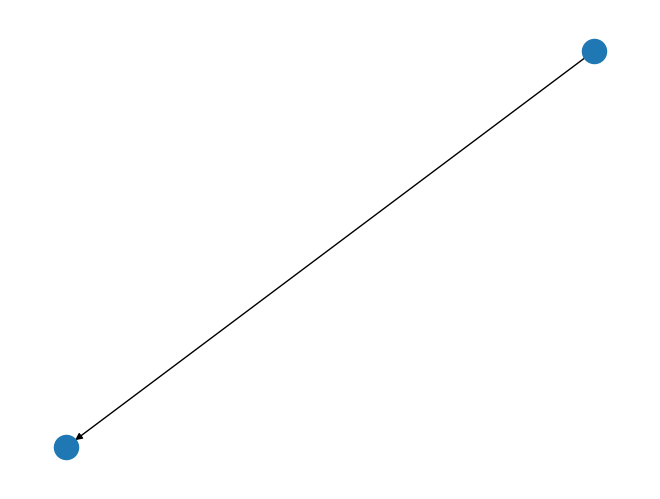

In [19]:
import networkx as nx
from torch_geometric.utils import to_networkx
G1 = to_networkx(dataset[110], to_undirected=False)
nx.draw(G1)

In [20]:
G1.nodes(data=True)

NodeDataView({0: {}, 1: {}})

In [21]:

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Data(edge_index=[2, 1], x=[2, 5], y=[1])
Number of nodes: 2
Number of edges: 1
Average node degree: 0.50
Has isolated nodes: False
Has self-loops: False
Is undirected: False


## Test-Train Split ##

In [22]:
import torch
from random import shuffle
torch.manual_seed(12345)
shuffle(dataset)

train_dataset = dataset[:198]
test_dataset = dataset[198:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 198
Number of test graphs: 52


In [29]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 64], x=[128, 5], y=[9], batch=[128], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 64], x=[128, 5], y=[7], batch=[128], ptr=[65])

Step 3:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 64], x=[128, 5], y=[16], batch=[128], ptr=[65])

Step 4:
Number of graphs in the current batch: 6
DataBatch(edge_index=[2, 6], x=[12, 5], y=[3], batch=[12], ptr=[7])



## Graph Convolution Network ##

In [30]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,GNNExplainer
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(456)
        self.fc=768
        self.conv1 = GCNConv(5, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 2)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        #x = x.relu()
        #x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        print('x_shape:',x.shape)
        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(5, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


## Train Accuracy: 88.14 Test Accuracy: 73.81 ##

In [31]:
model1 = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model1.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model1(data.x.type(torch.FloatTensor), data.edge_index.type(torch.LongTensor), data.batch.type(torch.LongTensor))  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model1.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         
         out = model1(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
         print(pred)
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

total_sum1=0
total_sum2=0
for epoch in range(1, 51):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    total_sum1 = train_acc + total_sum1
    total_sum2 = test_acc + total_sum2
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
avg1 = total_sum1/50
avg2 = total_sum2/50
print(avg1, avg2)

x_shape: torch.Size([64, 2])


ValueError: Expected input batch_size (64) to match target batch_size (13).

## Graph Attention Network ##

In [68]:
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        self.hid = 8
        self.in_head = 8
        self.out_head = 1
        
        
        self.conv1 = GATConv(3840, self.hid, heads=self.in_head, dropout=0.4)
        self.conv2 = GATConv(self.hid*self.in_head, 2, concat=False,
                             heads=self.out_head, dropout=0.4)



    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
        emb=x
        # 3. Apply a final classifier
        x = F.dropout(x, p=0.3, training=self.training)
        
        return F.log_softmax(x, dim=1)
    
    
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = "cpu"

model = GAT()

## Train Accuracy: 88.58 Test Accuracy: 77.74 ##

In [69]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         #print(out)
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         #print(out)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         print(pred)
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

total_sum1=0
total_sum2=0
for epoch in range(1, 51):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    total_sum1 = train_acc + total_sum1
    total_sum2 = test_acc + total_sum2
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
avg1 = total_sum1/50
avg2 = total_sum2/50
print(avg1, avg2)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 001, Train Acc: 0.8333, Test Acc: 0.8269
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
tensor([0, 0, 0, 1, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 013, Train Acc: 0.8485, Test Acc: 0.8462
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

Epoch: 022, Train Acc: 0.8333, Test Acc: 0.8269
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 023, Train Acc: 0.8333, Test Acc: 0.8269
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 035, Train Acc: 0.8333, Test Acc: 0.8269
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 047, Train Acc: 0.8333, Test Acc: 0.8269
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

## Create Joint Dataset ##

In [ ]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    #print(data['includes'])
    rootid=int(filename[:-6])
    r=df_join.loc[df_join['id']==rootid,['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified', 'text_info']]
    f,r,uf,ul,uv,label = r.values[0] 
    if uv == True:
        uv = 1
    else:
        uv = 0 
    d={}
    d[rootid]={'favorite_count': getEmbed((str(f))), 'retweet_count': getEmbed((str(r))), 'user_followers_count': getEmbed((str(uf))), 'user_listed_count': getEmbed((str(ul))), 'user_verified': getEmbed((str(uv)))}
    G=nx.DiGraph()
    G.add_node(rootid)
        
    for i,j in zip(data['data'][0], data["includes"]):
        G.add_node(int(i['id']))
        #d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        #print(type(getEmbed(str(i["public_metrics"]['like_count']))))
        #print(i["public_metrics"]['retweet_count']
        if j["users"][0]["verified"]==True:
            uv_1 = 1
        else: 
            uv_1 = 0
        d[int(i['id'])]={'favorite_count': getEmbed((str(i["public_metrics"]['like_count']))),'retweet_count': getEmbed((str(i["public_metrics"]['retweet_count']))), 'user_followers_count':  getEmbed((str(j["users"][0]["public_metrics"]['followers_count']))), 'user_listed_count':  getEmbed((str(j["users"][0]["public_metrics"]['listed_count']))), 'user_verified':  getEmbed((str(uv_1)))}
        #print(d[int(i['id'])])
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))

    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    #nx.draw(G1,with_labels=True)
    #print(d)
    nx.set_node_attributes(G1, d)
    #print(nx.get_node_attributes(G1,'favorite_count'))

    try:
        g_data=from_networkx(G1, group_node_attrs=['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified'])
        #print(rootid)
        #g_data=from_networkx(G1)
        g_data.y=0 if label=='informative' else 1
        data_arr.append(g_data)
    except Exception as e: print(e)
    
        
print(len(data_arr))

In [76]:
df1=pd.read_csv(r"C:\Users\91900\Capstone\cap-main\finalirmap.csv")
df1['id']=df1['id'].astype('int64')
data_arr=[]
count=0
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    conversation=json.load(fname)
    print(conversation)
    rootid=int(filename[:-6])
    r=df1.loc[df1['id']==rootid,['text','created_at','text_info']]
    #print(r)
    t,c,label=r.values[0]
    d={}

    d[rootid]={'time': getEmbed(c),'text': getEmbed(t)}
    
    G=nx.DiGraph()
    G.add_node(rootid)
    for i in data['data'][0]:
        G.add_node(int(i['id']))
        d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))
    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    nx.set_node_attributes(G1, d)

    try:

        g_data=from_networkx(G1, group_node_attrs=['text', 'time'])
        lab=0 if label=='informative' else 1
        g_data.y=lab
        data_arr.append((t,g_data,lab))
        count+=1
        print("done ",count)
        
    except:
        continue
print(data_arr[0])

TypeError: expected file

In [70]:
darr=data_arr


In [71]:
from interpret_text.experimental.common.utils_bert import Language, Tokenizer, BERTSequenceClassifier
from interpret_text.experimental.common.timer import Timer
from interpret_text.experimental.unified_information import UnifiedInformationExplainer
interpretBERT=torch.load('./model.ckpt')
interpretBERT
tokenizerIP=torch.load('./token.ckpt')
tokenizerIP
MAX_LEN=100

## Joint Model ##

In [72]:
class Joint(torch.nn.Module):
    def __init__(self,bert,gnn):
        super(Joint,self).__init__()
        self.bert=bert
        self.gnn=gnn
        self.fc1=Linear(832,64)
        self.fc2=Linear(64,2)
    
    def forward(self,x1,x2):
        textemb=torch.tensor(getEmbed(x1))
        tokens_text = tokenizerIP.tokenize([str(x1).lower()])
        tokens_text, mask_text, _ = tokenizerIP.preprocess_classification_tokens(tokens_text, MAX_LEN)
        o1=interpretBERT.predict(token_ids=tokens_text,input_mask=mask_text, batch_size=64)
        o2=self.gnn(x2.x,x2.edge_index,batch=None)
        pred = o2.argmax(dim=1)  
        
        
        x = torch.cat([textemb, torch.tensor(self.gnn.emb[0])], dim=-1)
        x=self.fc1(F.relu(x))
        x=self.fc2(F.relu(x))
        return x,o1,pred
    

In [73]:
for param in bert.parameters():
    param.requires_grad = False
for param in model1.parameters():
    param.requires_grad = False

jmodel=Joint(bert,model1)
print(jmodel)


Joint(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
      

In [74]:
from sklearn.model_selection import train_test_split
X=[[a[0],a[1]] for a in darr ]
y=[a[2] for a in darr]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: 0

In [75]:

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=jmodel.parameters(), lr=1e-3)



for epoch in range(5):
    running_loss = 0.0
    for i in range(len(X_train)):
        x1,x2=X_train[i]
        label=y_train[i]
        jmodel.train()

        optimizer.zero_grad()

        preds,_,_ = jmodel(x1, x2)
        
        loss = criterion(preds, torch.tensor(label))

        loss.requires_grad_(True)

        loss.backward()
        optimizer.step()
        #print(loss.item())
        running_loss += loss.item()
        if i % 50 == 49:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}')
            running_loss = 0.0

NameError: name 'X_train' is not defined

In [ ]:
correct = 0
total = 0
correcttext=0
correctgraph=0
with torch.no_grad():
    for i in range(len(X_test)):
        x1,x2=X_test[i]
        label=y_test[i]
        outputs,textpred,graphpred = jmodel(x1,x2)
        
        _, predicted = torch.max(outputs.data, -1)
        
        total += 1
        correct += 1 if predicted.item()==label else 0
        
        textpred=textpred[0]
        correcttext+=1 if textpred==label else 0
        correctgraph += 1 if graphpred.item()==label else 0
        print(label,predicted,textpred,graphpred)

In [ ]:
x1,x2=X_test[-2]
label=y_test[-2]
outputs,textpred,graphpred = jmodel(x1,x2)

_, predicted = torch.max(outputs.data, -1)


print("Original Text:",x1[:])
print("True Label:",label)
print("Predicted Label by joint model:",predicted.item())
textpred=textpred[0]
print("Predicted Label by text model:",textpred)
print("Predicted Label by graph model:",graphpred.item())


In [ ]:
print(f'Accuracy of the Joint Model on the {total} test tweets: {100 * correct / total} %')
print(f'Accuracy of the Text model on the {total} test tweets: {100 * correcttext / total} %')
print(f'Accuracy of the Graph model on the {total} test tweets: {100 * correctgraph / total} %')


## Intepreting Text: BERT ##

In [ ]:
from interpret_text.experimental.widget import ExplanationDashboard
interpreter_unified = UnifiedInformationExplainer(model=interpretBERT.model, 
                                 train_dataset=list(df_all["text"]), 
                                 device=device, 
                                 target_layer=14, 
                                 classes=[0,1])
def interpretTextPred(text,pred_label):
    explanation_unified = interpreter_unified.explain_local(text, pred_label)
    ExplanationDashboard(explanation_unified)

In [ ]:
#interpretTextPred(x1,1)
explanation_unified = interpreter_unified.explain_local(x1, textpred)
ExplanationDashboard(explanation_unified)

## Interpreting Graph: GNNExplainer ##

In [ ]:
expl = GNNExplainer(model1, epochs=200, return_type='raw', log=False)


In [ ]:
x, edge_index = x2.x, x2.edge_index
node_feat_mask, edge_mask = expl.explain_graph(x, edge_index)

In [ ]:
ax, G = expl.visualize_subgraph(node_idx=None, edge_index=edge_index, edge_mask=edge_mask)
plt.show()